# Data Preprocessing
Cleaning, transforming, and organizing the data will be applied to ensure it is in a suitable format for further analysation.

Importing Necessary libraries and loading in the dataset

## Imports

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from math import sqrt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

## Seeding 

In [2]:
random_seed = 42
np.random.seed = random_seed
tf.random.seed = random_seed

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

path = "."
filename_read = os.path.join(path, "spotify-2023.csv")

# Since we are working with a large dataset, we are setting low Memory to false.
# It is used to prevent that pandas guesses all of the data types of the dataset.
df = pd.read_csv(filename_read, encoding='latin1', low_memory=False, na_values=['NA', '?', 'NaN'])

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
# shape of the dataset
df.shape

(953, 24)

In [5]:
# shuffle dataset to remove order bias and enhance possible k-fold cross validation
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Tarot,"Bad Bunny, Jhay Cortez",2,2022,5,6,2482,20,608228647,27,...,114,B,Minor,80,42,68,2,0,66,4
1,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",2,2022,6,17,5871,27,618885532,81,...,163,NaN,Major,54,40,67,0,0,9,17
2,When I R.I.P.,Labrinth,1,2019,10,4,2578,0,203680270,8,...,80,G#,Minor,39,45,55,73,0,9,21
3,The Feels,TWICE,1,2021,10,1,1150,0,345903614,20,...,120,A,Major,81,92,90,9,0,8,7
4,TV,Billie Eilish,1,2022,7,21,3009,2,338564981,68,...,141,E,Minor,41,9,25,84,1,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Niï¿½ï¿½a Bo,"Sean Paul, Feid",2,2023,4,21,1305,34,115010040,29,...,91,G,Major,82,47,62,10,0,10,15
949,Space Song,Beach House,1,2015,1,1,17852,4,789753877,69,...,147,NaN,Minor,51,62,79,22,13,14,3
950,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,177,NaN,Major,34,39,16,97,0,12,5
951,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1555511105,344,...,126,B,Minor,81,59,90,5,0,36,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Dropping the instrumentalness column since most of its entries are null and therefore not usable

In [7]:
df.drop(columns='instrumentalness_%', inplace=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,Tarot,"Bad Bunny, Jhay Cortez",2,2022,5,6,2482,20,608228647,27,...,0,114,B,Minor,80,42,68,2,66,4
1,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",2,2022,6,17,5871,27,618885532,81,...,34,163,NaN,Major,54,40,67,0,9,17
2,When I R.I.P.,Labrinth,1,2019,10,4,2578,0,203680270,8,...,0,80,G#,Minor,39,45,55,73,9,21
3,The Feels,TWICE,1,2021,10,1,1150,0,345903614,20,...,2,120,A,Major,81,92,90,9,8,7
4,TV,Billie Eilish,1,2022,7,21,3009,2,338564981,68,...,25,141,E,Minor,41,9,25,84,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Niï¿½ï¿½a Bo,"Sean Paul, Feid",2,2023,4,21,1305,34,115010040,29,...,44,91,G,Major,82,47,62,10,10,15
949,Space Song,Beach House,1,2015,1,1,17852,4,789753877,69,...,NaN,147,NaN,Minor,51,62,79,22,14,3
950,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,2,177,NaN,Major,34,39,16,97,12,5
951,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1555511105,344,...,NaN,126,B,Minor,81,59,90,5,36,3


In [8]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [9]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
liveness_%               0
speechiness_%            0
dtype: int64

As seen in the latter cell, column "in_shazam_charts" has 50 missing values and column "key" has 95 missing values.
Firstly, we will fill the "in_shazam_charts" missing columns with the median value for that column.

In [10]:
# Replace commas with an empty string and convert to float
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '').astype(float)

# Calculate the median and fill missing values
med = df['in_shazam_charts'].median()
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(med)

# Check for remaining missing values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
liveness_%               0
speechiness_%            0
dtype: int64

We are going to replace the missing key of the song with the key from the previous non-null row.

In [11]:
df['key'].fillna(method='ffill', inplace=True)
# Check for remaining missing values.
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
liveness_%              0
speechiness_%           0
dtype: int64

In [12]:
column_data_types = df.dtypes

print(column_data_types)


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
liveness_%                int64
speechiness_%             int64
dtype: object


In [13]:
# convert streams and in_deezer_playlist to numeric data type
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# row 885 had an unrecognisable float number. The following entry: 
# BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3
# was replaced with nan and nan with the median value for that column
median_streams = df['streams'].median()
df.loc[885, 'streams'] = median_streams

column_data_types = df.dtypes
print(column_data_types)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
liveness_%                int64
speechiness_%             int64
dtype: object


Now that there are no missing values we completed the first data preprocess which allows us to now further investigate aspects
of this dataset.

In [14]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,Tarot,"Bad Bunny, Jhay Cortez",2,2022,5,6,2482,20,6.082286e+08,27,...,0.0,114,B,Minor,80,42,68,2,66,4
1,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",2,2022,6,17,5871,27,6.188855e+08,81,...,34.0,163,B,Major,54,40,67,0,9,17
2,When I R.I.P.,Labrinth,1,2019,10,4,2578,0,2.036803e+08,8,...,0.0,80,G#,Minor,39,45,55,73,9,21
3,The Feels,TWICE,1,2021,10,1,1150,0,3.459036e+08,20,...,2.0,120,A,Major,81,92,90,9,8,7
4,TV,Billie Eilish,1,2022,7,21,3009,2,3.385650e+08,68,...,25.0,141,E,Minor,41,9,25,84,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Niï¿½ï¿½a Bo,"Sean Paul, Feid",2,2023,4,21,1305,34,1.150100e+08,29,...,44.0,91,G,Major,82,47,62,10,10,15
949,Space Song,Beach House,1,2015,1,1,17852,4,7.897539e+08,69,...,2.0,147,G,Minor,51,62,79,22,14,3
950,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,1.861043e+08,9,...,2.0,177,G,Major,34,39,16,97,12,5
951,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1.555511e+09,344,...,2.0,126,B,Minor,81,59,90,5,36,3


# Exploratory Data Analysis

### How are the songs distributed across different release years, months, days?

In [15]:
import matplotlib.pyplot as plt

# Extract release years, months, and days
release_years = df["released_year"]
release_months = df["released_month"]
release_days = df["released_day"]

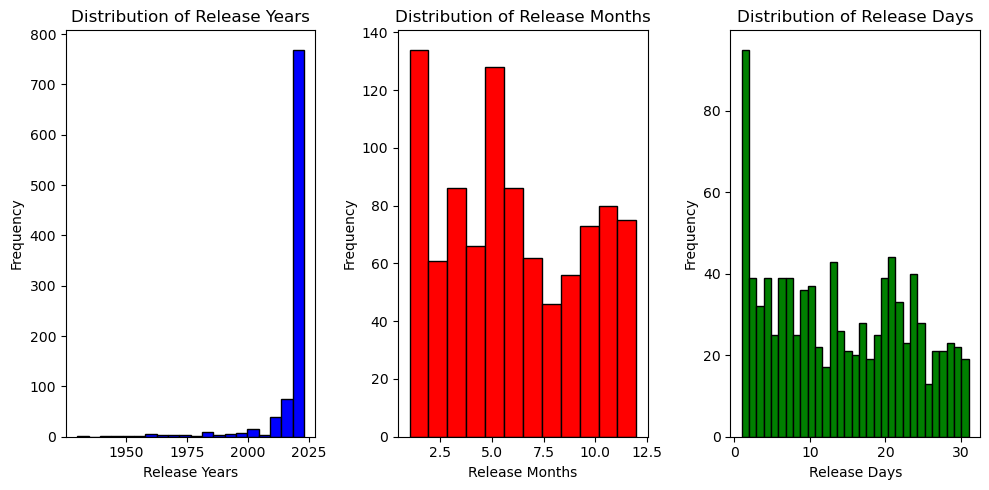

In [16]:
plt.figure(figsize=(10, 5))

# Bar chart for release years
plt.subplot(1, 3, 1)
plt.hist(release_years, bins=20, color='blue', edgecolor='black')
plt.xlabel('Release Years')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')

# Bar chart for release months
plt.subplot(1, 3, 2)
plt.hist(release_months, bins=12, color='red', edgecolor='black')
plt.xlabel('Release Months')
plt.ylabel('Frequency')
plt.title('Distribution of Release Months')

# Bar chart for release days
plt.subplot(1, 3, 3)
plt.hist(release_days, bins=31, color='green', edgecolor='black')
plt.xlabel('Release Days')
plt.ylabel('Frequency')
plt.title('Distribution of Release Days')

# prevent overlap
plt.tight_layout()

plt.show()

Most of the songs release on the first of the month.

### How many songs have different artists contributing?¶

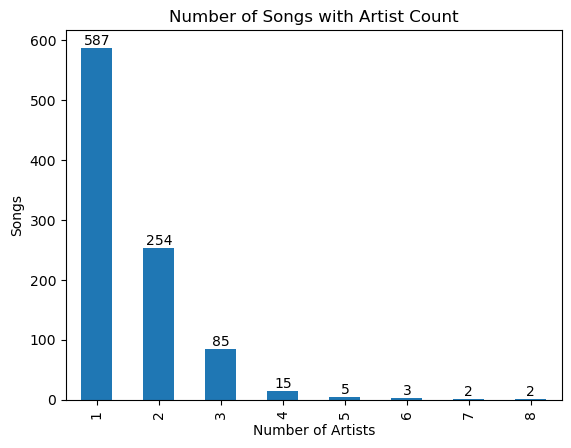

In [17]:
# Store the count of songs for each artist
artist_counts = df['artist_count'].value_counts()

# Plot on a barchart.
chart = artist_counts.plot(kind='bar')

# Add data labels
for p in chart.patches:
    chart.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Configure the plot.
plt.title('Number of Songs with Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('Songs')
plt.show()

### How diverse are they keys and mode of songs?

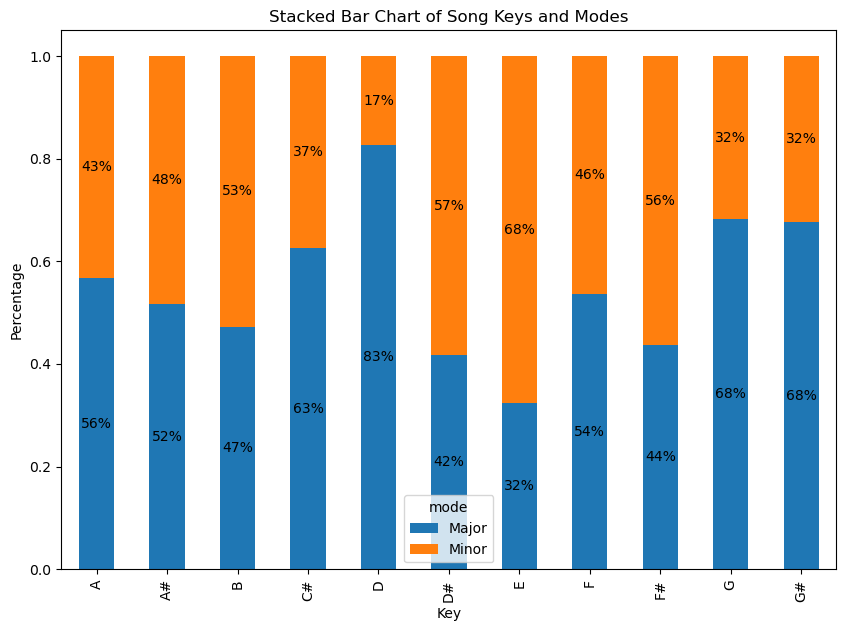

In [18]:
# Stacked Bar Chart
key_mode_group = df.groupby(['key', 'mode']).size().unstack()

#Divide each group size by the sum of group sizes for each key to get the percentage.
key_mode_pcnt = key_mode_group.divide(key_mode_group.sum(axis=1), axis=0)

stacked_bar = key_mode_pcnt.plot(kind='bar', stacked=True, figsize=(10,7))

# Adding annotations
for p in stacked_bar.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    
    # Round the height to 2dp, and times by 100 for a percentage (as 0 is min, 1 is max.)
    bar_pcnt = int(round(height,2)*100)
    
    # Write the percentage on the bar, center alligned.
    stacked_bar.annotate(f"{bar_pcnt}%", (x+width/2,y+height/2), ha='center', va='center')

# Setting the plot axis labels and title.
plt.title('Stacked Bar Chart of Song Keys and Modes')
plt.xlabel('Key')
plt.ylabel('Percentage')

# Show the plot.
plt.show()

Additionally, We are able to output the most diverse and the least diverse keys by using the absolute difference between the major/minor mode percentages of each key.

In [19]:
# Calculate the diversity of each key by taking the absolute difference between the percentages of Major and Minor modes
key_diversity = key_mode_pcnt.apply(lambda row: abs(row['Major'] - row['Minor']), axis=1)
least_diverse_key = key_diversity.idxmin()
most_diverse_key = key_diversity.idxmax()

# Output the information.
print(f"The key with the least diversity between Major and Minor is: {least_diverse_key}")
print(f"The key with the most diversity between Major and Minor is: {most_diverse_key}")

The key with the least diversity between Major and Minor is: A#
The key with the most diversity between Major and Minor is: D


### Top 10 Most streamed artists

In [20]:
# artist names are grouped by the amount of streams they have and are sorted in order
top_streamed_artists = df.groupby('artist(s)_name')['streams'].sum().reset_index()
top_streamed_artists = top_streamed_artists.sort_values(by='streams', ascending=False)

# top 10 most streamed artists
top_10_streamed_artists = top_streamed_artists.head(10)
print(top_10_streamed_artists)


      artist(s)_name       streams
572       The Weeknd  1.418555e+10
558     Taylor Swift  1.405366e+10
159       Ed Sheeran  1.390895e+10
223     Harry Styles  1.160865e+10
43         Bad Bunny  9.997800e+09
431   Olivia Rodrigo  7.442149e+09
171           Eminem  6.183806e+09
75        Bruno Mars  5.846921e+09
25    Arctic Monkeys  5.569807e+09
229  Imagine Dragons  5.272485e+09


### What is the relationship between a songs tempo/bpm and its danceability?

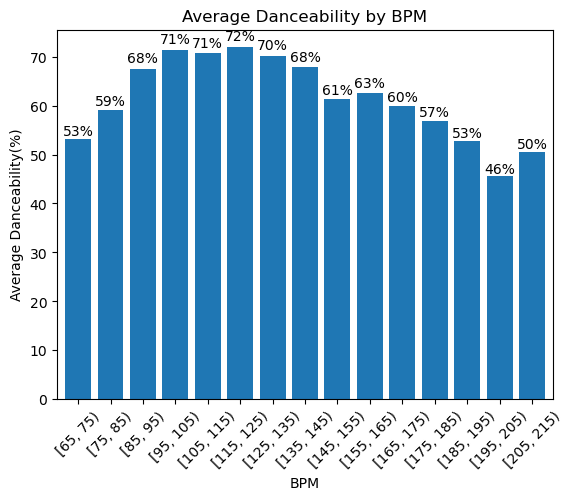

In [22]:
# Split the BPM into bins of 10.
bins = np.arange(df['bpm'].min(), df['bpm'].max() + 10, 10)

# Assign the bins.
bpm_bin = pd.cut(df['bpm'], bins, right=False, include_lowest=True)

# Get the mean(average) danceability per bin
dance_grouped = df.groupby(bpm_bin)['danceability_%'].mean()

# Plot the barchart with rotated X axis text.
grouped_bar = dance_grouped.plot(kind='bar', width=0.8, rot=45)

# Add axis names and titles
grouped_bar.set_xlabel('BPM')
grouped_bar.set_ylabel('Average Danceability(%)')
grouped_bar.set_title('Average Danceability by BPM')

# Annotate the axis
for p in grouped_bar.patches:
    percentage = int(round(p.get_height()))
    grouped_bar.annotate(f"{percentage}%", 
                (p.get_x() + p.get_width() / 2.0, p.get_height() * 1.03), 
                ha = 'center', va = 'center')

### How are the streams distributed?

Text(0.5, 1.0, 'Distribution of Streams')

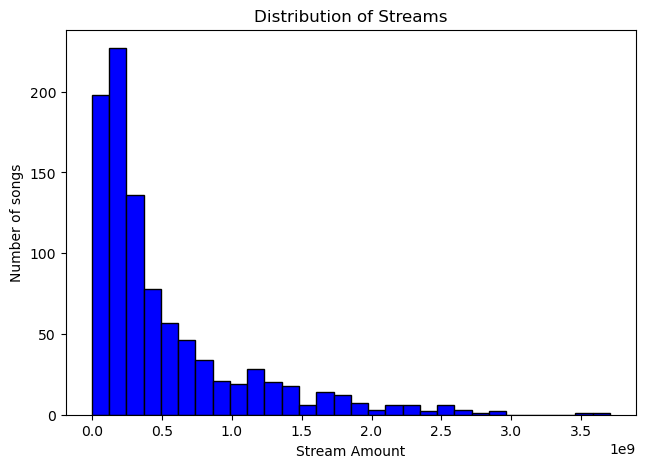

In [24]:
streams = df['streams']
plt.figure(figsize=(25, 5))

# Bar chart for release years
plt.subplot(1, 3, 1)
plt.hist(streams, bins=30, color='blue', edgecolor='black')
plt.xlabel('Stream Amount')
plt.ylabel('Number of songs')
plt.title('Distribution of Streams')

A lot of the songs have around 200+ Million streams. Fewer songs have 500 million and more streams

### Top 10 Most streamed songs 

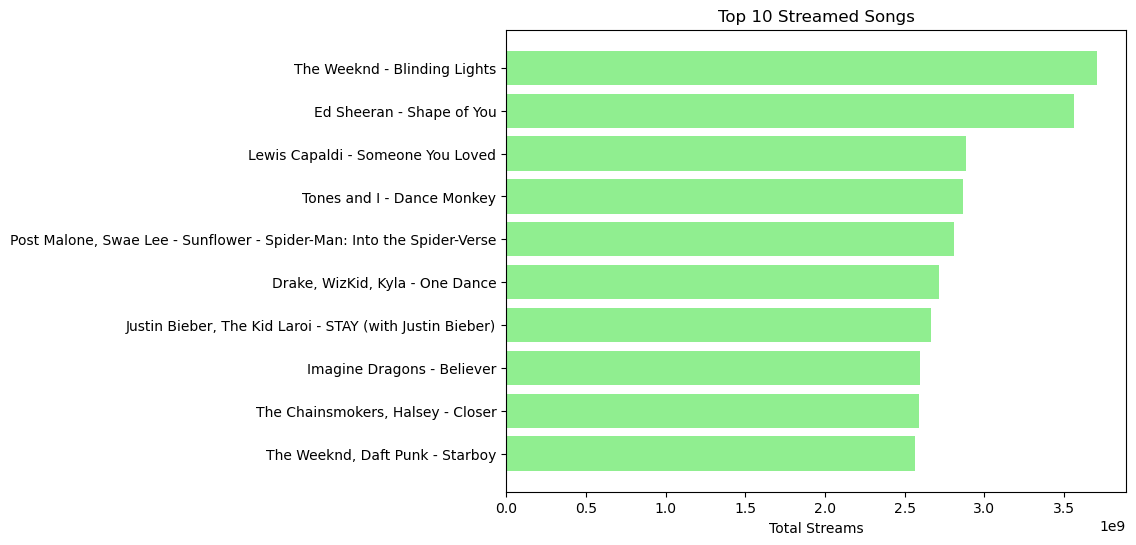

In [25]:
# Get top 10 songs based on the streams column
top_10_songs = df.nlargest(10, 'streams')

# Combine artist name and track_name for display purposes
top_10_artist_track_name = top_10_songs['artist(s)_name'] + ' - ' + top_10_songs['track_name']

# Extract streams 
performance = top_10_songs['streams']

# horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))

y_pos = np.arange(len(top_10_artist_track_name))

# Plot the horizontal bars
ax.barh(y_pos, performance, color='lightgreen')

ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_artist_track_name)

# Invert y-axis for better visualization as it places top streamed songs in descending order
ax.invert_yaxis()

ax.set_xlabel('Total Streams')
ax.set_title('Top 10 Streamed Songs')

plt.show()


### Trend of musical features over the years

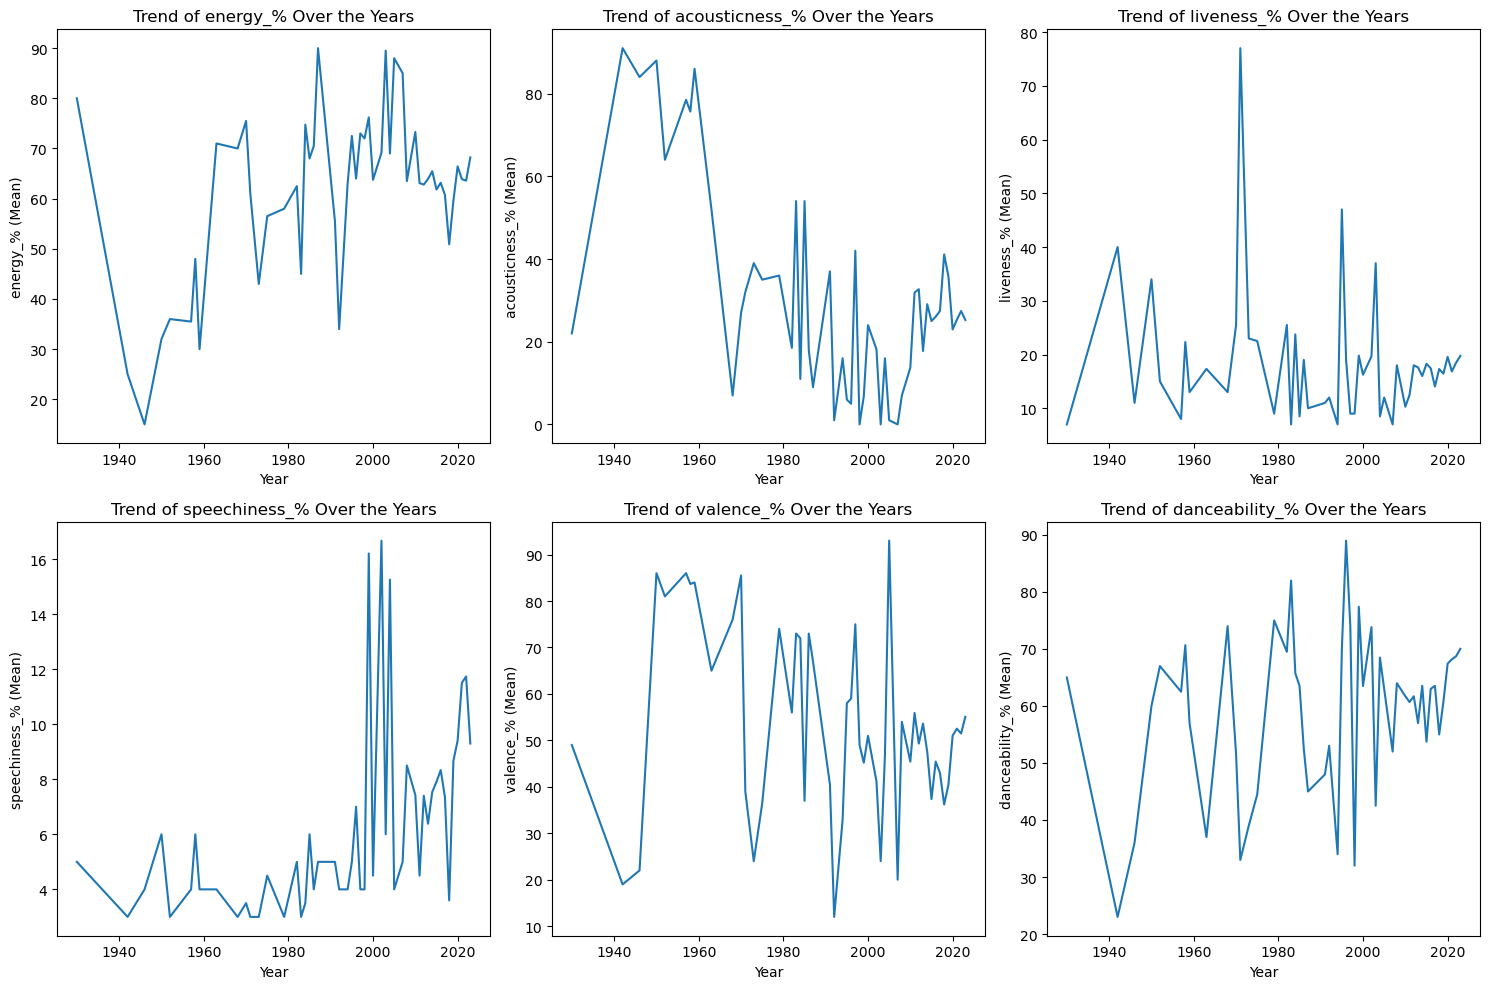

In [26]:
import matplotlib.pyplot as plt

musical_features = ['energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%', 'valence_%', 'danceability_%']

# Group by released_year and calculate the mean of each musical feature
mean_features_by_year = df.groupby('released_year')[musical_features].mean()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

# Loop through each musical feature and plot it
for feature, ax in zip(musical_features, axes):
    ax.plot(mean_features_by_year.index, mean_features_by_year[feature])
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{feature} (Mean)')
    ax.set_title(f'Trend of {feature} Over the Years')

plt.tight_layout()

plt.show()

### Looking at the top 100 songs on each distribution plattform, are there any patterns on release month?

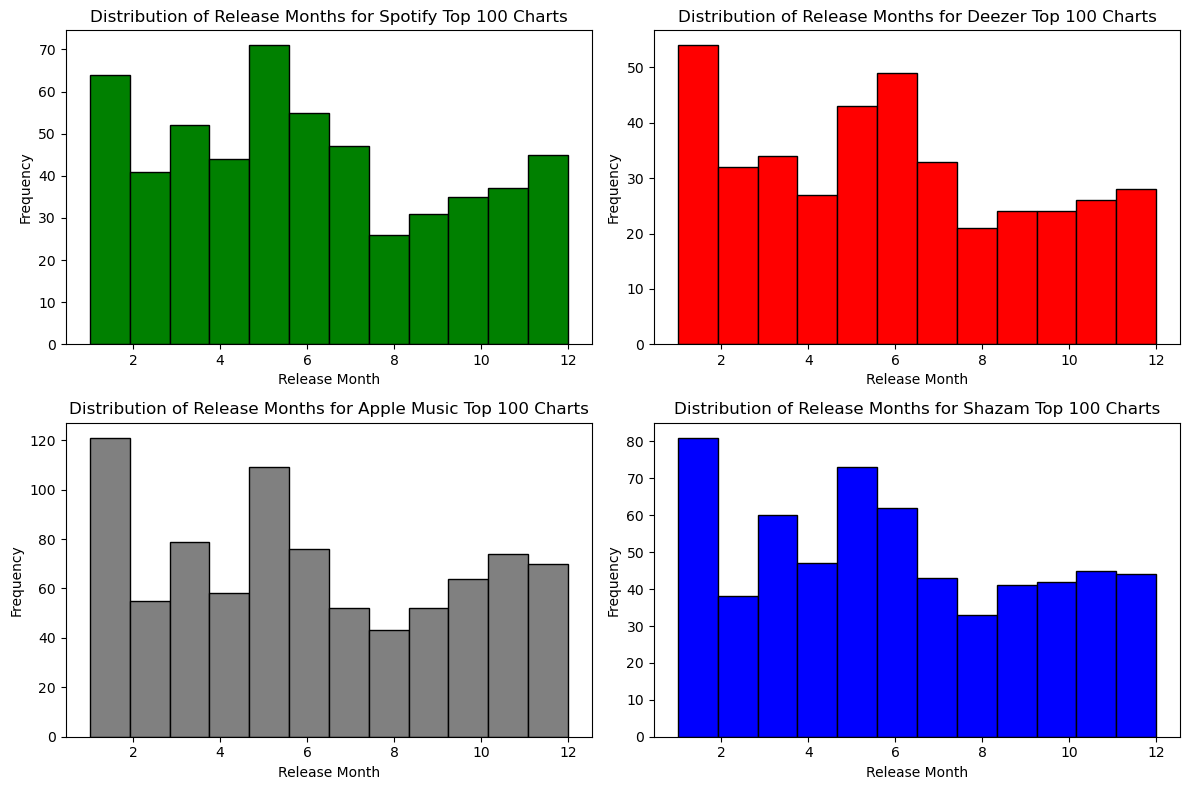

In [27]:
# Filter songs with in_spotify_charts above to 0 which removes all songs that are not charted
spotify_charts_filtered = df[df["in_spotify_charts"] > 0]

# Get the 100 songs with the smallest values 
spotify_charts_top_100 = spotify_charts_filtered.nsmallest(100, "in_spotify_charts")

deezer_charts_filtered = df[df["in_deezer_charts"] > 0]
deezer_charts_top_100 = deezer_charts_filtered.nsmallest(100, "in_deezer_charts")

apple_charts_filtered = df[df["in_apple_charts"] > 0]
apple_charts_top_100 = apple_charts_filtered.nsmallest(100, "in_apple_charts")

shazam_charts_filtered = df[df["in_shazam_charts"] > 0]
shazam_charts_top_100 = shazam_charts_filtered.nsmallest(100, "in_shazam_charts")


# function to plot release months
def plot_release_months(df, platform, col, axes):
    release_months = df["released_month"]
    axes.hist(release_months, bins=12, color=col, edgecolor='black')
    axes.set_xlabel('Release Month')
    axes.set_ylabel('Frequency')
    axes.set_title(f'Distribution of Release Months for {platform} Top 100 Charts')

# subplots 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Call the function for each platform
plot_release_months(spotify_charts_filtered, "Spotify", "green",axes[0, 0])
plot_release_months(deezer_charts_filtered, "Deezer", "red", axes[0, 1])
plot_release_months(apple_charts_filtered, "Apple Music", "grey", axes[1, 0])
plot_release_months(shazam_charts_filtered, "Shazam", "blue", axes[1, 1])

plt.tight_layout()


plt.show()




As seen in the above illustration, there exists is a consistency on release timing of the top 100 charting songs across the different plattforms.

January is a popular time for new music releases for top songs. This could be because many artists and record labels aim to start the year with fresh content, taking advantage of the holiday season when people have more leisure time to discover and enjoy new music.

Theres also a significant spike in May. May falls before the summer season. Artists and labels may strategically release music early summer to capture the attention of listeners leading up for summer. Songs with a summer vibe or catchy tunes tend to be popular during this time.

### Correlation of features

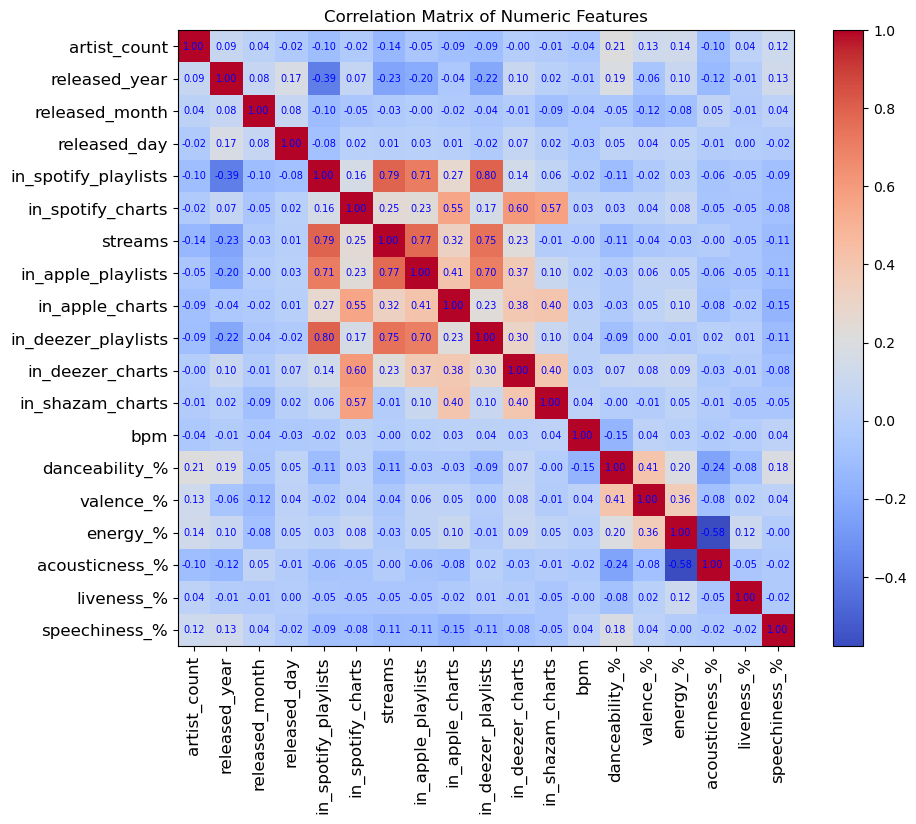

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Selected numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

fig.colorbar(cax)

# labels for the heatmap
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))

ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(correlation_matrix.columns, rotation='vertical' ,fontsize=12)

ax.set_yticklabels(correlation_matrix.columns, fontsize=12)

# Annotate each cell with the correlation value
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha="center", va="center", color="b",fontsize=7)

plt.title('Correlation Matrix of Numeric Features')

plt.show()


There is a notable correlation between song streams and playlist inclusion, indicating that songs with higher streaming numbers tend to be featured in playlists across various platforms. This suggests a strong relationship between a song's popularity, as measured by streams, and its inclusion in curated playlists.

In [29]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
liveness_%               0
speechiness_%            0
dtype: int64

In [30]:
# Calculate the median and fill missing values
med = df['streams'].median()
df['streams'] = df['streams'].fillna(med)

# Check for remaining missing values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
liveness_%               0
speechiness_%            0
dtype: int64

In [31]:
# Calculate the median and fill missing values
med = df['in_deezer_playlists'].median()
df['in_deezer_playlists'] = df['in_deezer_playlists'].fillna(med)

# Check for remaining missing values
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
liveness_%              0
speechiness_%           0
dtype: int64

# Feature engineering

We will have to encode some columns in order to make proper use of them when applying the machine learning models

In [32]:
# Columns to encode
df['mode'] = pd.factorize(df['mode'])[0]
df['key'] = pd.factorize(df['key'])[0]
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,Tarot,"Bad Bunny, Jhay Cortez",2,2022,5,6,2482,20,6.082286e+08,27,...,0.0,114,0,0,80,42,68,2,66,4
1,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",2,2022,6,17,5871,27,6.188855e+08,81,...,34.0,163,0,1,54,40,67,0,9,17
2,When I R.I.P.,Labrinth,1,2019,10,4,2578,0,2.036803e+08,8,...,0.0,80,1,0,39,45,55,73,9,21
3,The Feels,TWICE,1,2021,10,1,1150,0,3.459036e+08,20,...,2.0,120,2,1,81,92,90,9,8,7
4,TV,Billie Eilish,1,2022,7,21,3009,2,3.385650e+08,68,...,25.0,141,3,0,41,9,25,84,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Niï¿½ï¿½a Bo,"Sean Paul, Feid",2,2023,4,21,1305,34,1.150100e+08,29,...,44.0,91,8,1,82,47,62,10,10,15
949,Space Song,Beach House,1,2015,1,1,17852,4,7.897539e+08,69,...,2.0,147,8,0,51,62,79,22,14,3
950,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,1.861043e+08,9,...,2.0,177,8,1,34,39,16,97,12,5
951,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1.555511e+09,344,...,2.0,126,0,0,81,59,90,5,36,3


## Train, validation, test split + normalization of data (musical features)

In [39]:
# numeric columns used for model
numeric_columns = df.select_dtypes(include='number').columns
X_mus = df[numeric_columns].drop(['streams','in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts','released_year','in_shazam_charts'], axis=1)
y = df['streams']

# Split the data into training and temp in order to then split temp into validation and test
X_train_mus, X_temp_mus, y_train_mus, y_temp_mus = train_test_split(X_mus, y, test_size=0.3, random_state=random_seed)

# Split the temp data into validation and test
X_val_mus, X_test_mus, y_val_mus, y_test_mus = train_test_split(X_temp_mus, y_temp_mus, test_size=0.5, random_state=random_seed)

# Normalize with Min-Max scaling
scaler_X_mus = MinMaxScaler()
scaler_y_mus = MinMaxScaler()

# Fit the scaler on the training data
X_train_scaled_mus = scaler_X_mus.fit_transform(X_train_mus)
X_val_scaled_mus = scaler_X_mus.transform(X_val_mus)
X_test_scaled_mus = scaler_X_mus.transform(X_test_mus)

# Standardize the target variable
y_train_scaled_mus = scaler_y_mus.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled_mus = scaler_y_mus.transform(y_val.values.reshape(-1, 1))
y_test_scaled_mus = scaler_y_mus.transform(y_test.values.reshape(-1, 1))



np.max(y_train_scaled_mus)

1.0

## Train, validation, test split + normalization of data (all numeric features)

In [40]:
# numeric columns used for model
numeric_columns = df.select_dtypes(include='number').columns
X = df[numeric_columns].drop(['streams'], axis=1)
y = df['streams']

# Split the data into training and temp in order to then split temp into validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Split the temp data into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

# Normalize with Min-Max scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scaler on the training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))



np.max(y_train_scaled)

1.0

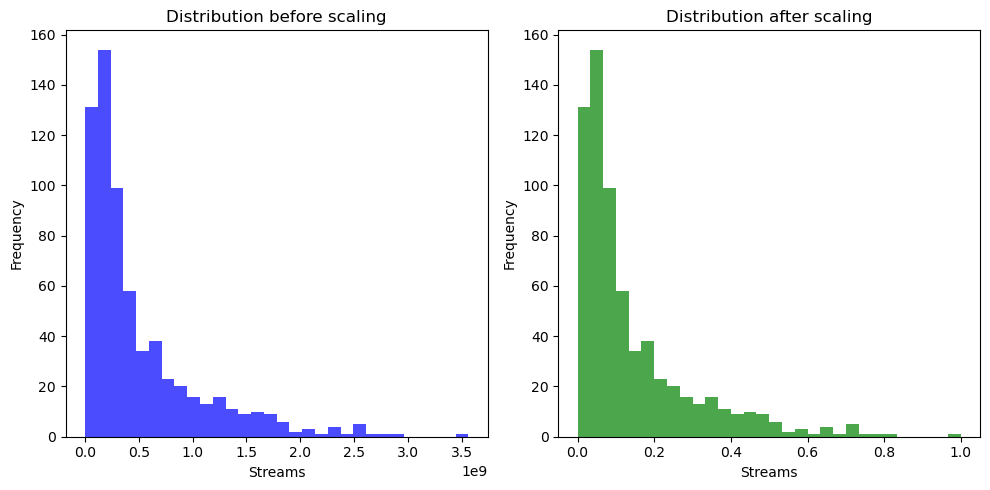

In [41]:
import matplotlib.pyplot as plt

# Before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Distribution before scaling')
plt.xlabel('Streams')
plt.ylabel('Frequency')

# After scaling
plt.subplot(1, 2, 2)
plt.hist(y_train_scaled, bins=30, color='green', alpha=0.7)
plt.title('Distribution after scaling')
plt.xlabel('Streams')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Regression Tasks

## Linear Regression

Linear Regression Validation Mean Squared Error: 0.006113441751978468
Linear Regression Test Mean Squared Error: 5.57543007885552e+17


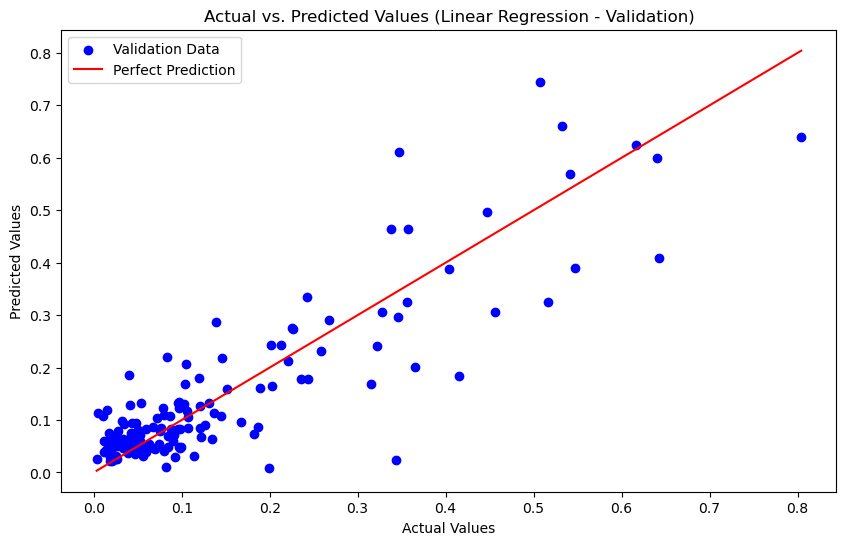

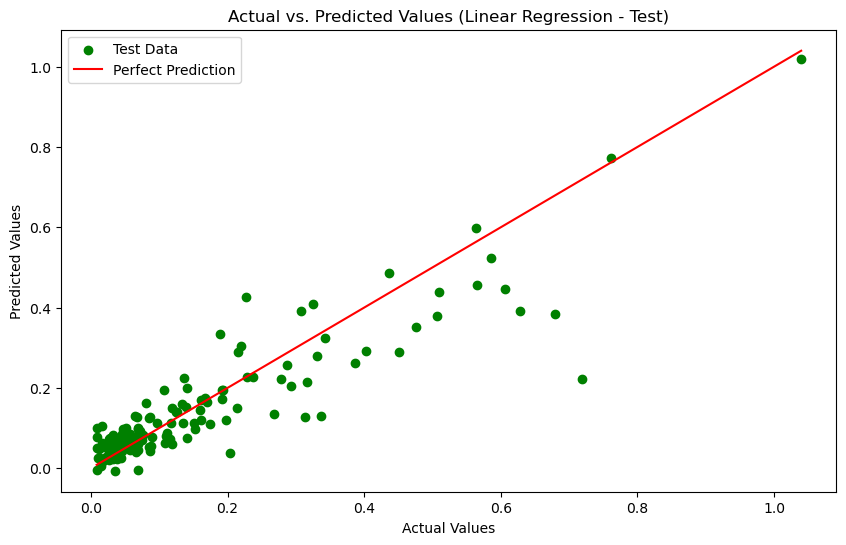

In [42]:
# Linear Regression
linear_model = LinearRegression()

# Train the model on the scaled training data
linear_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the scaled validation set
linear_val_predictions_scaled = linear_model.predict(X_val_scaled)

# Inverse transform predictions to the original scale
#linear_val_predictions = scaler_y.inverse_transform(linear_val_predictions_scaled)

# Evaluate model performance on the validation set
linear_val_mse = mean_squared_error(y_val_scaled, linear_val_predictions_scaled)
print("Linear Regression Validation Mean Squared Error:", linear_val_mse)

# Make predictions on scaled test set
linear_test_predictions_scaled = linear_model.predict(X_test_scaled)

# Inverse transform predictions to the original scale
linear_test_predictions = scaler_y.inverse_transform(linear_test_predictions_scaled)

# Evaluate model performance on test set
linear_test_mse = mean_squared_error(y_test_scaled, linear_test_predictions)
print("Linear Regression Test Mean Squared Error:", linear_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled, linear_val_predictions_scaled, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled), max(y_val_scaled)], [min(y_val_scaled), max(y_val_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, linear_test_predictions_scaled, color='green', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression - Test)')
plt.legend()
plt.show()

## Linear Regression (musical features)

Linear Regression Validation Mean Squared Error: 0.02440601477928593
Linear Regression Test Mean Squared Error: 2.765856517404699e+17


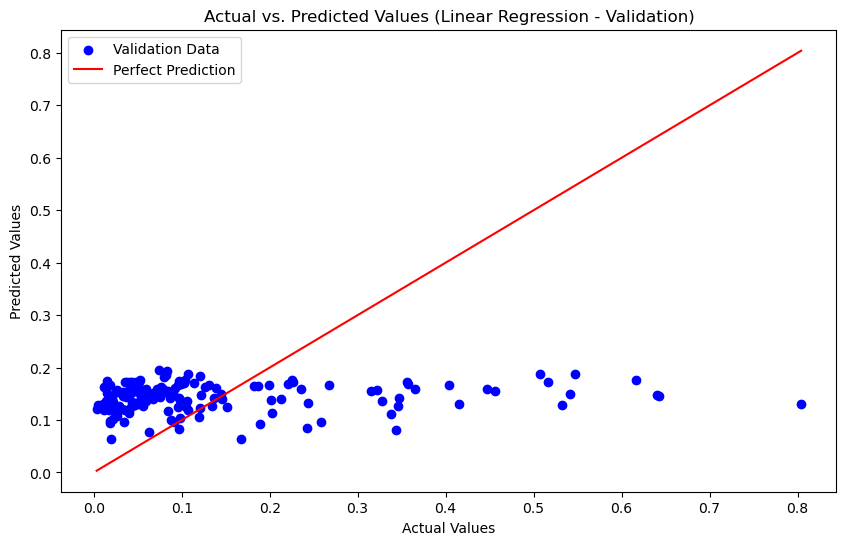

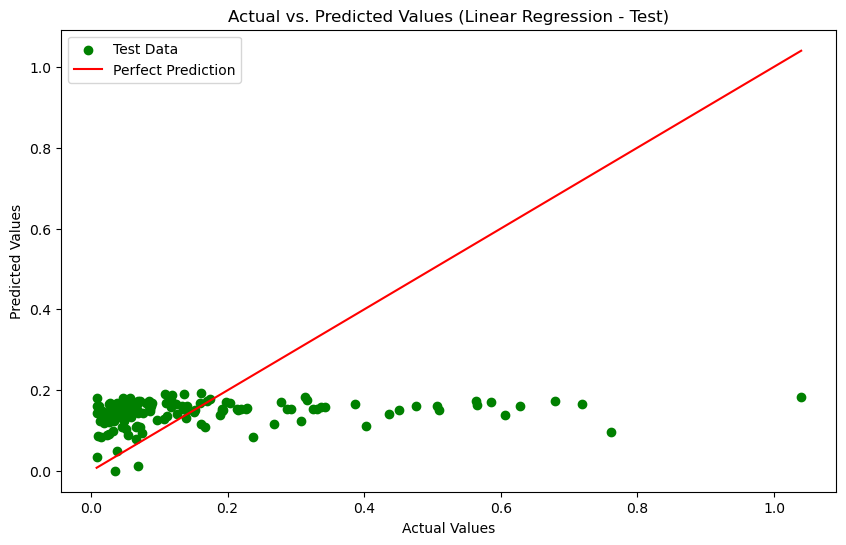

In [43]:
# Linear Regression
linear_model = LinearRegression()

# Train the model on the scaled training data
linear_model.fit(X_train_scaled_mus, y_train_scaled_mus)

# Make predictions on the scaled validation set
linear_val_predictions_scaled = linear_model.predict(X_val_scaled_mus)

# Inverse transform predictions to the original scale
#linear_val_predictions = scaler_y.inverse_transform(linear_val_predictions_scaled)

# Evaluate model performance on the validation set
linear_val_mse = mean_squared_error(y_val_scaled_mus, linear_val_predictions_scaled)
print("Linear Regression Validation Mean Squared Error:", linear_val_mse)

# Make predictions on scaled test set
linear_test_predictions_scaled = linear_model.predict(X_test_scaled_mus)

# Inverse transform predictions to the original scale
linear_test_predictions = scaler_y.inverse_transform(linear_test_predictions_scaled)

# Evaluate model performance on test set
linear_test_mse = mean_squared_error(y_test_scaled_mus, linear_test_predictions)
print("Linear Regression Test Mean Squared Error:", linear_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled_mus, linear_val_predictions_scaled, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled_mus), max(y_val_scaled_mus)], [min(y_val_scaled_mus), max(y_val_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, linear_test_predictions_scaled, color='green', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression - Test)')
plt.legend()
plt.show()

## Random Forest Regressor

Random Forest Validation Mean Squared Error: 0.0032056550621794443
Random Forest Test Mean Squared Error: 0.005594432312878145


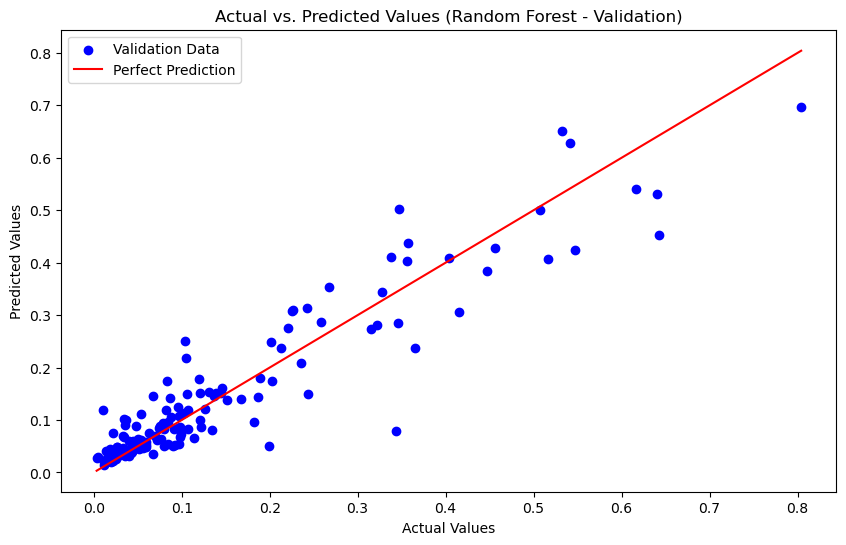

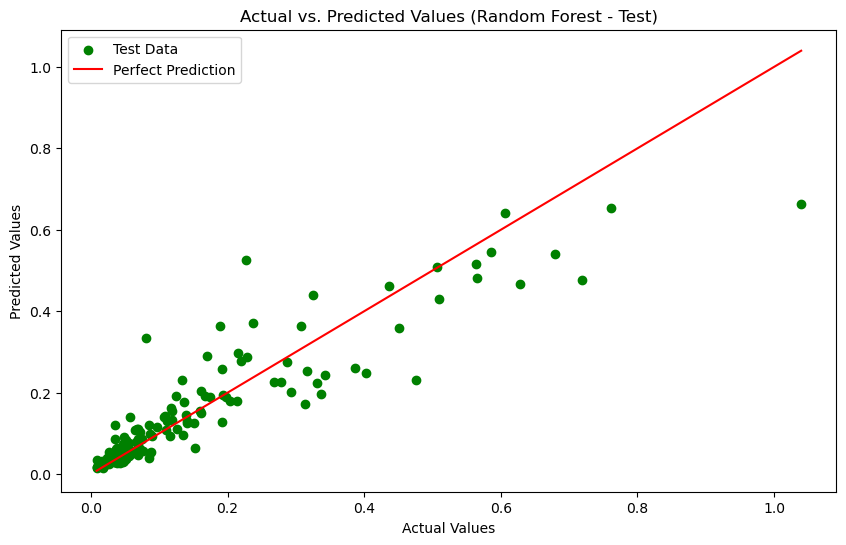

In [44]:
# Standardize the target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Train a Random Forest model on the scaled training data
rf_model = RandomForestRegressor(random_state=random_seed, n_estimators=100)
rf_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the scaled validation set
rf_val_predictions = rf_model.predict(X_val_scaled)

# Evaluate model performance on the validation set
rf_val_mse = mean_squared_error(y_val_scaled, rf_val_predictions)
print("Random Forest Validation Mean Squared Error:", rf_val_mse)

# Make predictions on the scaled test set
rf_test_predictions = rf_model.predict(X_test_scaled)

# Evaluate model performance on the test set
rf_test_mse = mean_squared_error(y_test_scaled, rf_test_predictions)
print("Random Forest Test Mean Squared Error:", rf_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled, rf_val_predictions, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled), max(y_val_scaled)], [min(y_val_scaled), max(y_val_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, rf_test_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest - Test)')
plt.legend()
plt.show()


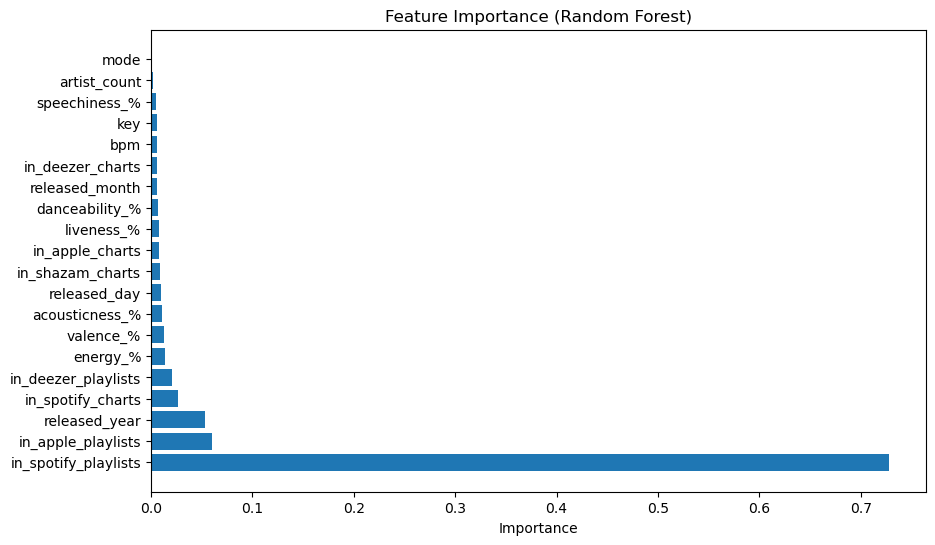

In [45]:
feature_importances = rf_model.feature_importances_

# df with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': numeric_columns.drop(['streams']),
    'Importance': feature_importances
})

# Sort by importance 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

### Random Forest (Parameter Tuning)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 80}
Random Forest Mean Squared Error: 0.005839391243317238


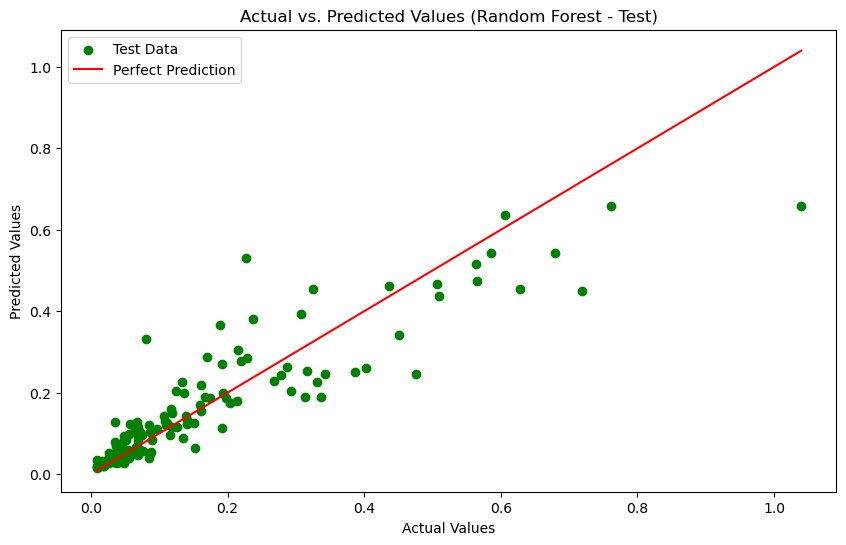

In [46]:

# Parameter grid for grid search
param_grid = {
    'n_estimators': [50, 80, 100, 120],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search initialisation
grid_search = GridSearchCV(RandomForestRegressor(random_state=random_seed), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit 
grid_search.fit(X_train_scaled, y_train_scaled) 

# the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model from grid search
rf_predictions = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate model performance
rf_mse = mean_squared_error(y_test_scaled, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, rf_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest - Test)')
plt.legend()
plt.show()

## Random Forest Regressor (musical features)

Random Forest Validation Mean Squared Error: 0.02503794142935006
Random Forest Test Mean Squared Error: 0.029683279209220252


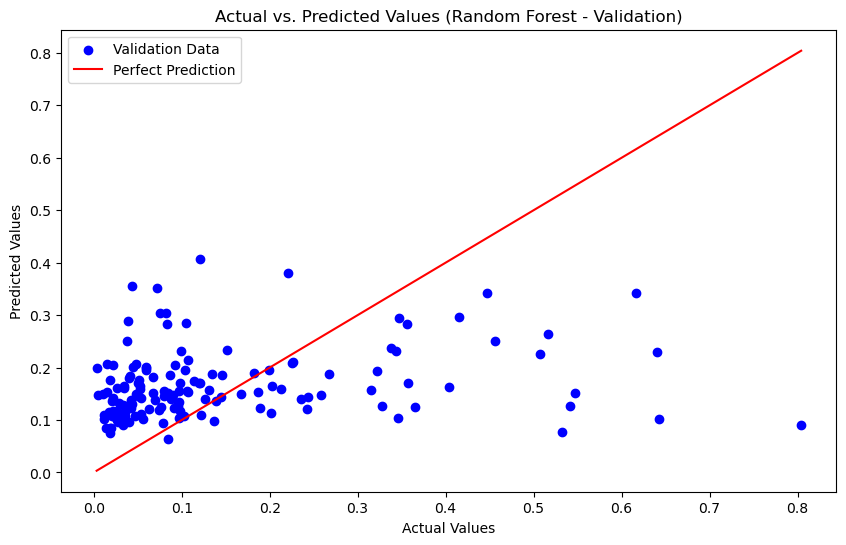

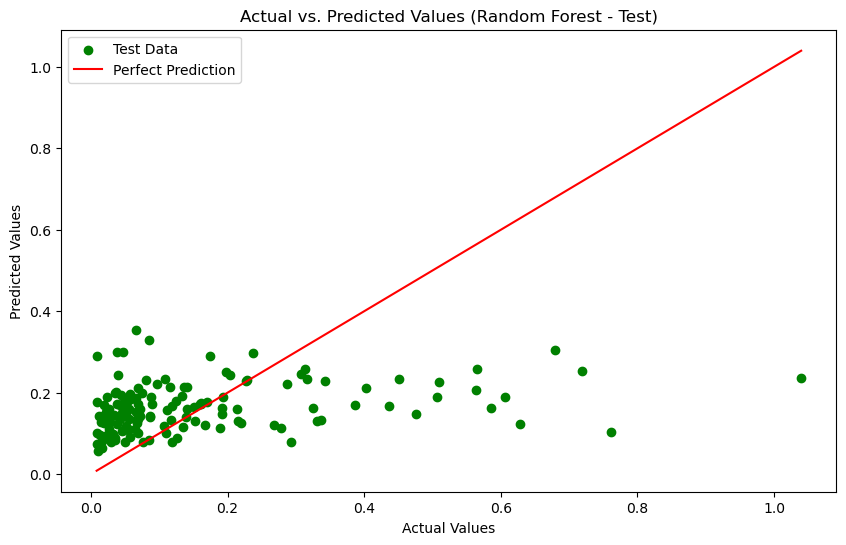

In [47]:
# Standardize the target variable
y_train_scaled_mus = scaler_y.fit_transform(y_train_mus.values.reshape(-1, 1)).ravel()
y_val_scaled_mus = scaler_y.transform(y_val_mus.values.reshape(-1, 1)).ravel()
y_test_scaled_mus = scaler_y.transform(y_test_mus.values.reshape(-1, 1)).ravel()

# Train a Random Forest model on the scaled training data
rf_model = RandomForestRegressor(random_state=random_seed, n_estimators=100)
rf_model.fit(X_train_scaled_mus, y_train_scaled_mus)

# Make predictions on the scaled validation set
rf_val_predictions = rf_model.predict(X_val_scaled_mus)

# Evaluate model performance on the validation set
rf_val_mse = mean_squared_error(y_val_scaled_mus, rf_val_predictions)
print("Random Forest Validation Mean Squared Error:", rf_val_mse)

# Make predictions on the scaled test set
rf_test_predictions = rf_model.predict(X_test_scaled_mus)

# Evaluate model performance on the test set
rf_test_mse = mean_squared_error(y_test_scaled_mus, rf_test_predictions)
print("Random Forest Test Mean Squared Error:", rf_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled_mus, rf_val_predictions, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled_mus), max(y_val_scaled_mus)], [min(y_val_scaled_mus), max(y_val_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, rf_test_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest - Test)')
plt.legend()
plt.show()

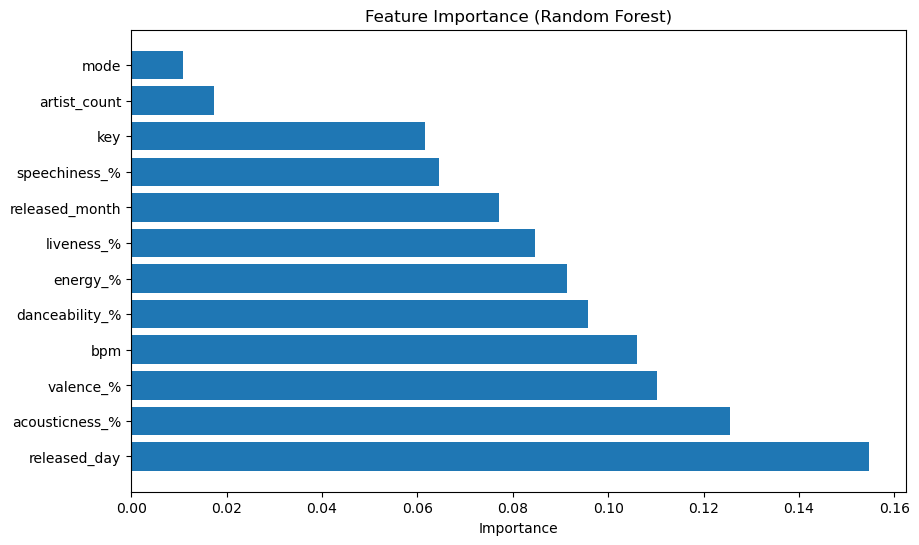

In [48]:
feature_importances = rf_model.feature_importances_

# df with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': numeric_columns.drop(['streams','in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts','released_year','in_shazam_charts']),
    'Importance': feature_importances
})

# Sort by importance 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

### Random forest Regressor (Parameter tuning musical features)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 120}
Random Forest Mean Squared Error: 0.027989706592715612


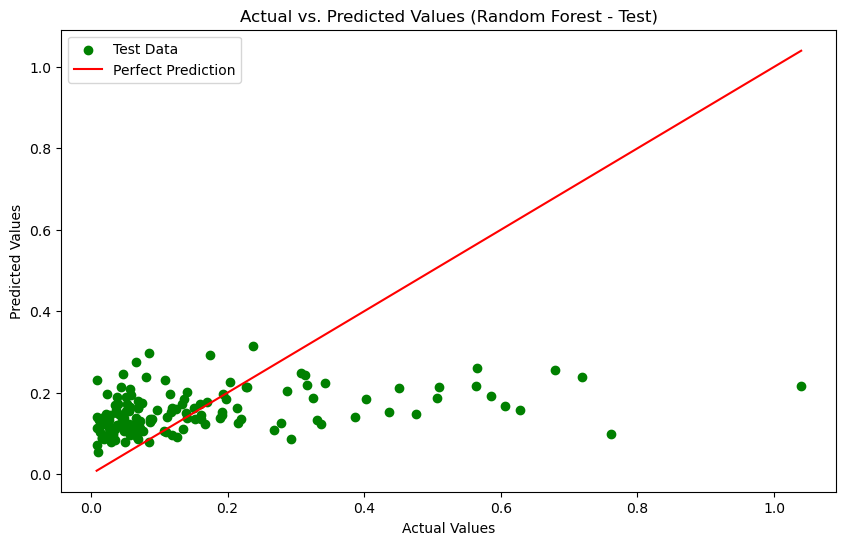

In [49]:
# Parameter grid for grid search
param_grid = {
    'n_estimators': [50, 80, 100, 120],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search initialisation
grid_search = GridSearchCV(RandomForestRegressor(random_state=random_seed), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit 
grid_search.fit(X_train_scaled_mus, y_train_scaled_mus) 

# the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model from grid search
rf_predictions = grid_search.best_estimator_.predict(X_test_scaled_mus)

# Evaluate model performance
rf_mse = mean_squared_error(y_test_scaled, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, rf_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest - Test)')
plt.legend()
plt.show()

## K-Neighbors Regressor

K-Nearest Neighbors Validation Mean Squared Error: 0.011287132425471205
K-Nearest Neighbors Test Mean Squared Error: 0.015366199821592697


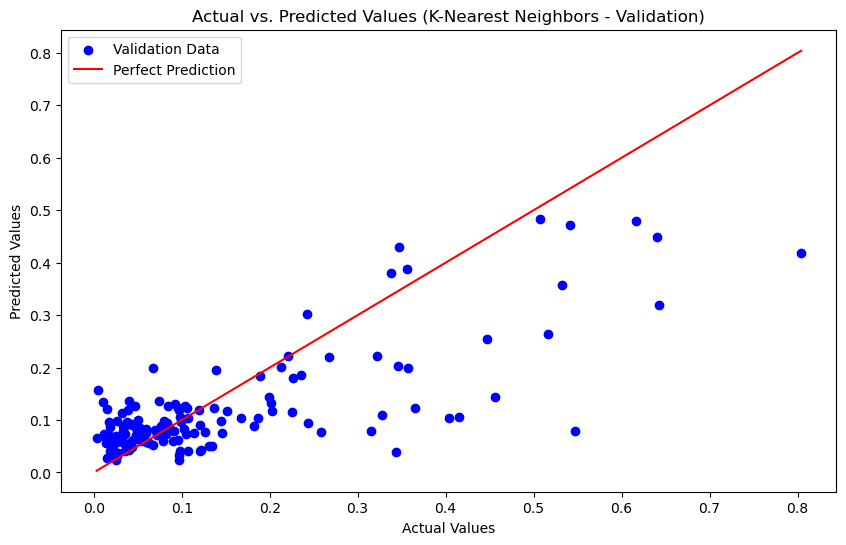

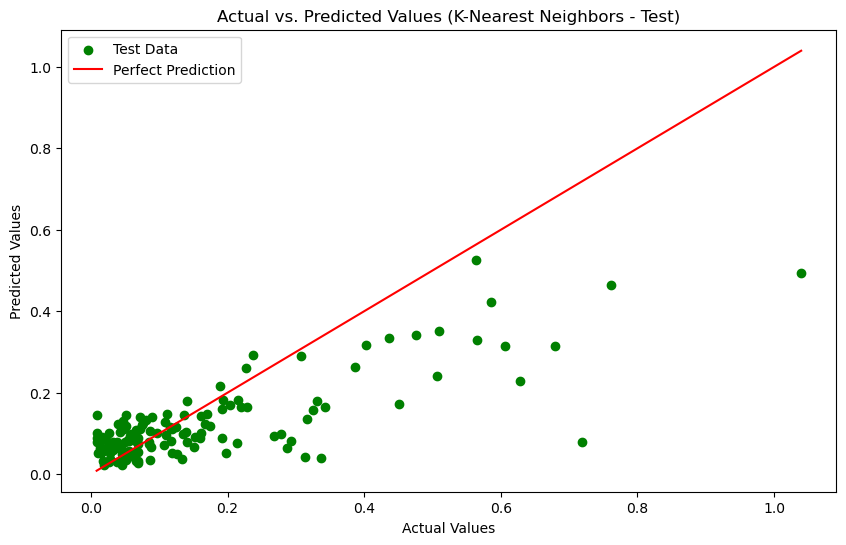

In [50]:
# Train k-Nearest Neighbors model on the scaled training data
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the scaled validation set
knn_val_predictions = knn_model.predict(X_val_scaled)

# Evaluate model performance on the validation set
knn_val_mse = mean_squared_error(y_val_scaled, knn_val_predictions)
print("K-Nearest Neighbors Validation Mean Squared Error:", knn_val_mse)

# Make predictions on the scaled test set
knn_test_predictions = knn_model.predict(X_test_scaled)

# Evaluate model performance on the test set
knn_test_mse = mean_squared_error(y_test_scaled, knn_test_predictions)
print("K-Nearest Neighbors Test Mean Squared Error:", knn_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled, knn_val_predictions, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled), max(y_val_scaled)], [min(y_val_scaled), max(y_val_scaled)], color='red', label='Perfect Prediction')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, knn_test_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors - Test)')
plt.legend()
plt.show()

### K-nearest neighbor regressor (Parameter tuning)

In [51]:
# K-Nearest Neighbors hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8 ,9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create K-Nearest Neighbors model
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
knn_grid_search = GridSearchCV(
    knn_model,
    knn_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=random_seed),
    scoring='neg_mean_squared_error'
)

# Fit the grid search to the data
knn_grid_search.fit(X_train_scaled, y_train_scaled)

# Print the best hyperparameters
print("K-Nearest Neighbors Best Hyperparameters:", knn_grid_search.best_params_)

# Make predictions using the best model from grid search
knn_predictions = knn_grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate model performance
knn_mse = mean_squared_error(y_test_scaled, knn_predictions)
print("K-Nearest Neighbors Mean Squared Error:", knn_mse)


K-Nearest Neighbors Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
K-Nearest Neighbors Mean Squared Error: 0.014200065567279633


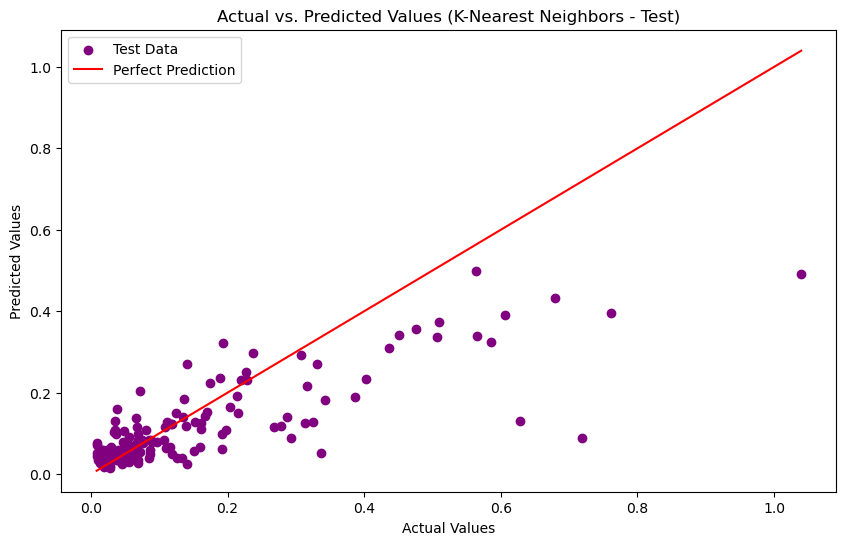

In [52]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, knn_predictions, color='purple', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors - Test)')
plt.legend()
plt.show()

## K-nearest neighbor Regressor (musical features)

K-Nearest Neighbors Validation Mean Squared Error: 0.028192948961065598
K-Nearest Neighbors Test Mean Squared Error: 0.033024579756093554


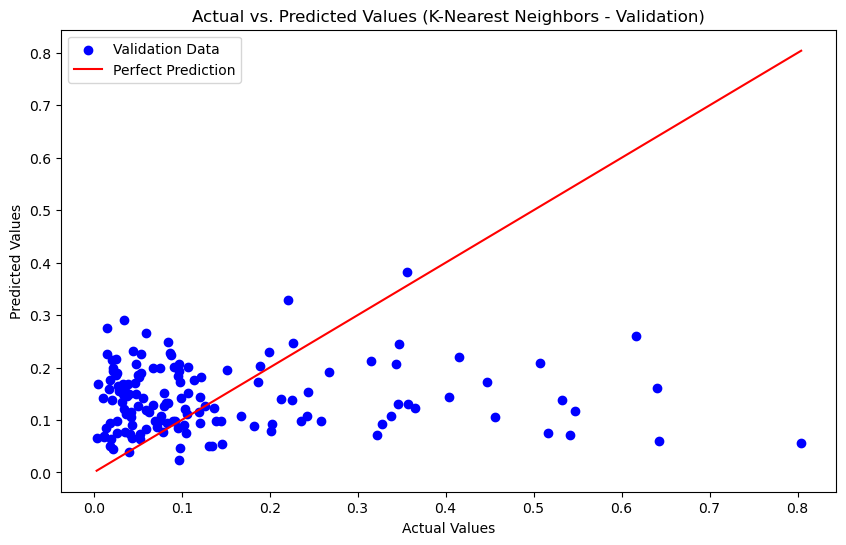

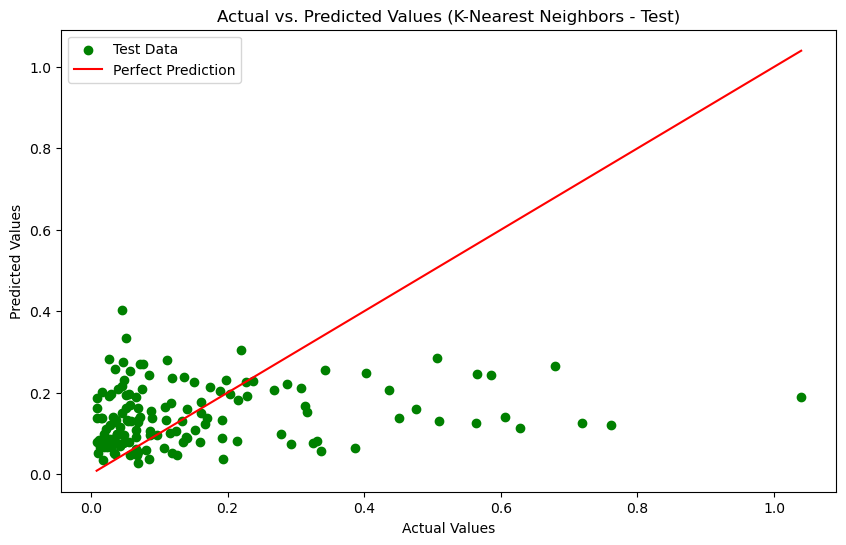

In [53]:
# Train k-Nearest Neighbors model on the scaled training data
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train_scaled_mus, y_train_scaled_mus)

# Make predictions on the scaled validation set
knn_val_predictions = knn_model.predict(X_val_scaled_mus)

# Evaluate model performance on the validation set
knn_val_mse = mean_squared_error(y_val_scaled_mus, knn_val_predictions)
print("K-Nearest Neighbors Validation Mean Squared Error:", knn_val_mse)

# Make predictions on the scaled test set
knn_test_predictions = knn_model.predict(X_test_scaled_mus)

# Evaluate model performance on the test set
knn_test_mse = mean_squared_error(y_test_scaled_mus, knn_test_predictions)
print("K-Nearest Neighbors Test Mean Squared Error:", knn_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled_mus, knn_val_predictions, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled_mus), max(y_val_scaled_mus)], [min(y_val_scaled_mus), max(y_val_scaled_mus)], color='red', label='Perfect Prediction')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, knn_test_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors - Test)')
plt.legend()
plt.show()

### K-nearest neighbor regressor (Parameter tuning musical features)

In [54]:
# K-Nearest Neighbors hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8 ,9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create K-Nearest Neighbors model
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
knn_grid_search = GridSearchCV(
    knn_model,
    knn_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=random_seed),
    scoring='neg_mean_squared_error'
)

# Fit the grid search to the data
knn_grid_search.fit(X_train_scaled_mus, y_train_scaled_mus)

# Print the best hyperparameters
print("K-Nearest Neighbors Best Hyperparameters:", knn_grid_search.best_params_)

# Make predictions using the best model from grid search
knn_predictions = knn_grid_search.best_estimator_.predict(X_test_scaled_mus)

# Evaluate model performance
knn_mse = mean_squared_error(y_test_scaled_mus, knn_predictions)
print("K-Nearest Neighbors Mean Squared Error:", knn_mse)

K-Nearest Neighbors Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
K-Nearest Neighbors Mean Squared Error: 0.03133450397562007


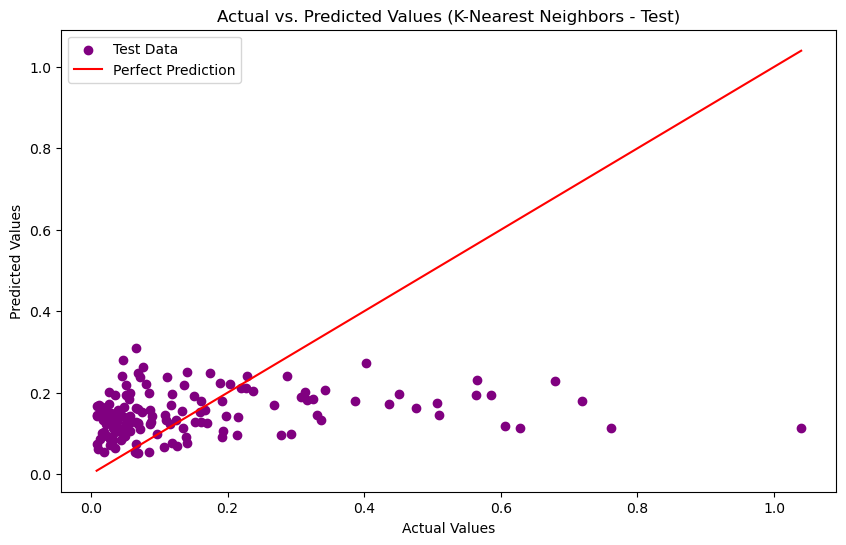

In [55]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, knn_predictions, color='purple', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (K-Nearest Neighbors - Test)')
plt.legend()
plt.show()

## SVR

Support Vector Regressor Validation Mean Squared Error: 0.006911763921926779
Support Vector Regressor Test Mean Squared Error: 0.008794818533319045


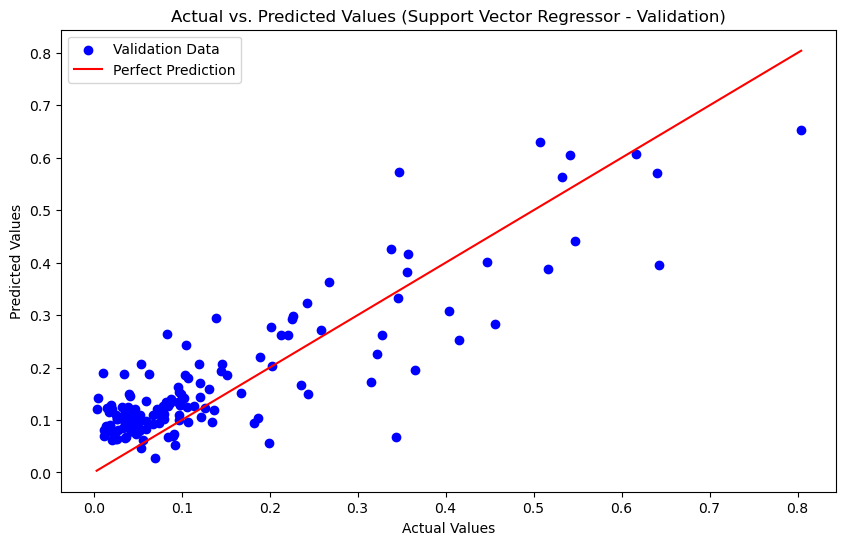

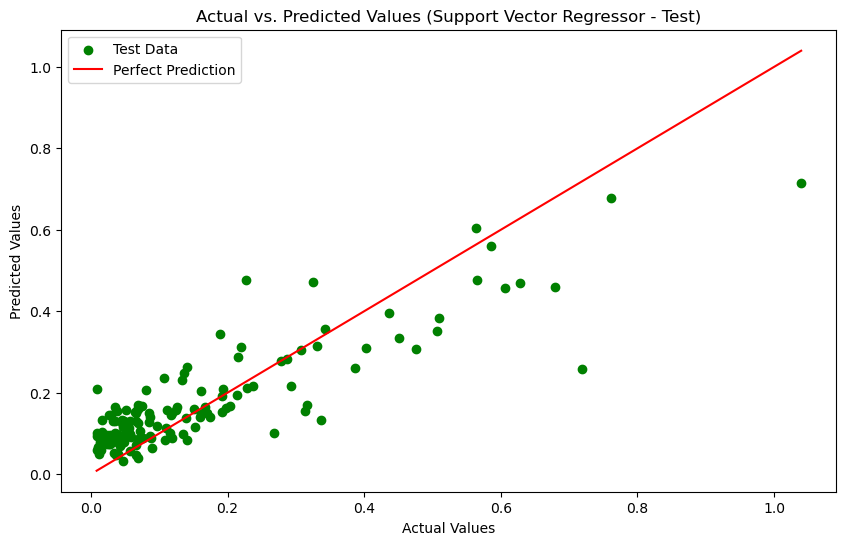

In [56]:
# Train a Support Vector Regressor on the scaled training data
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the scaled validation set
svr_val_predictions = svr_model.predict(X_val_scaled)

# Evaluate model performance on the validation set
svr_val_mse = mean_squared_error(y_val_scaled, svr_val_predictions)
print("Support Vector Regressor Validation Mean Squared Error:", svr_val_mse)

# Make predictions on the scaled test set
svr_test_predictions = svr_model.predict(X_test_scaled)

# Evaluate model performance on the test set
svr_test_mse = mean_squared_error(y_test_scaled, svr_test_predictions)
print("Support Vector Regressor Test Mean Squared Error:", svr_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled, svr_val_predictions, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled), max(y_val_scaled)], [min(y_val_scaled), max(y_val_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Support Vector Regressor - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, svr_test_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Support Vector Regressor - Test)')
plt.legend()
plt.show()

### SVR (parameter tuning)

In [57]:
# Define the SVM model
svm_model = SVR()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a grid search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_scaled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model from grid search
svm_predictions = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate model performance
svm_mse = mean_squared_error(y_test_scaled, svm_predictions)
print("Support Vector Machine Test set Mean Squared Error:", svm_mse)

# Evaluate model performance on the training set
svm_predictions_train = grid_search.best_estimator_.predict(X_train_scaled)
svm_mse_train = mean_squared_error(y_train_scaled, svm_predictions_train)
print("Support Vector Machine Training Set Mean Squared Error:", svm_mse_train)

# compare actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test_scaled, 'Predicted': svm_predictions})

# Display results
print(results_df.head())

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Support Vector Machine Test set Mean Squared Error: 0.006575709089162149
Support Vector Machine Training Set Mean Squared Error: 0.006302436403097875
     Actual  Predicted
0  0.063976   0.161221
1  0.118211   0.070476
2  0.035656   0.067422
3  0.022854   0.085886
4  0.037544   0.081282


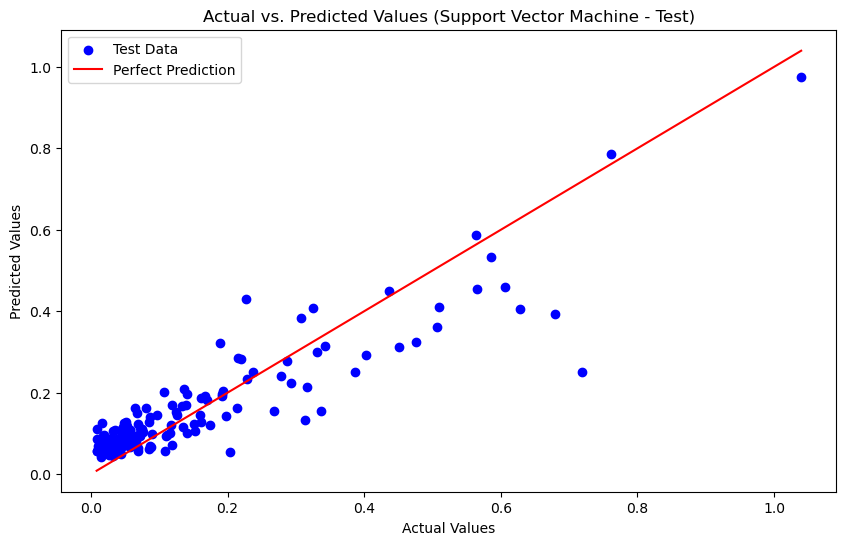

In [58]:
# Plot actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, svm_predictions, color='blue', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Support Vector Machine - Test)')
plt.legend()
plt.show()

## SVR (musical features)

Support Vector Regressor Validation Mean Squared Error: 0.02396607535540576
Support Vector Regressor Test Mean Squared Error: 0.03128637947378706


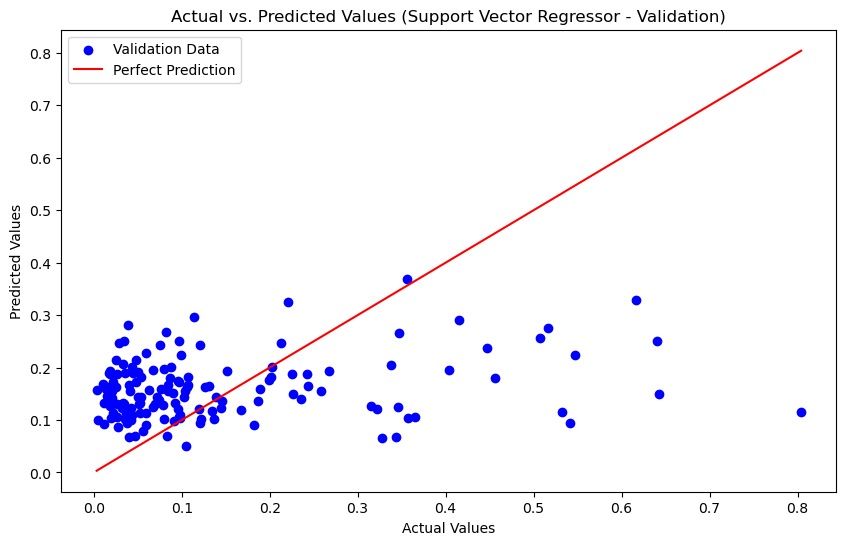

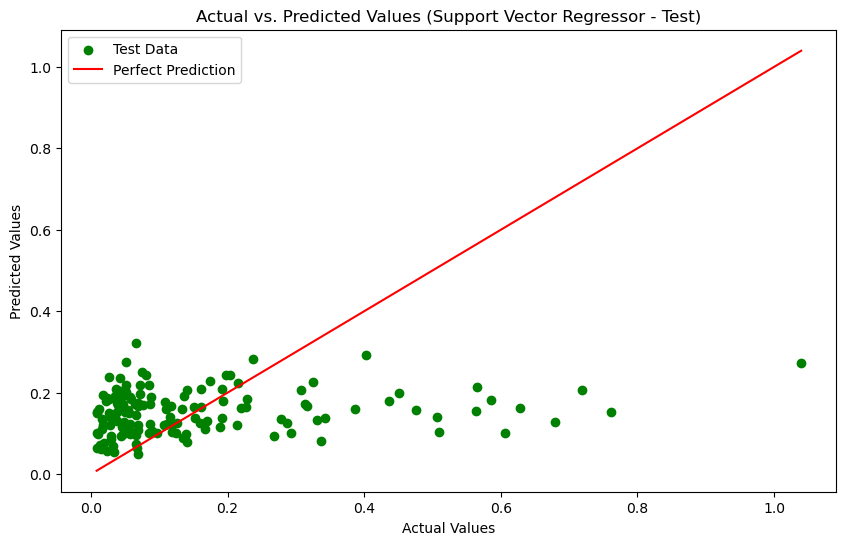

In [59]:
# Train a Support Vector Regressor on the scaled training data
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled_mus, y_train_scaled_mus)

# Make predictions on the scaled validation set
svr_val_predictions = svr_model.predict(X_val_scaled_mus)

# Evaluate model performance on the validation set
svr_val_mse = mean_squared_error(y_val_scaled_mus, svr_val_predictions)
print("Support Vector Regressor Validation Mean Squared Error:", svr_val_mse)

# Make predictions on the scaled test set
svr_test_predictions = svr_model.predict(X_test_scaled_mus)

# Evaluate model performance on the test set
svr_test_mse = mean_squared_error(y_test_scaled_mus, svr_test_predictions)
print("Support Vector Regressor Test Mean Squared Error:", svr_test_mse)

# Plot actual vs. predicted values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val_scaled_mus, svr_val_predictions, color='blue', label='Validation Data')
plt.plot([min(y_val_scaled_mus), max(y_val_scaled_mus)], [min(y_val_scaled_mus), max(y_val_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Support Vector Regressor - Validation)')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, svr_test_predictions, color='green', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Support Vector Regressor - Test)')
plt.legend()
plt.show()

## SVR (parameter tuning musical features)

In [60]:
# Define the SVM model
svm_model = SVR()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a grid search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled_mus, y_train_scaled_mus)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model from grid search
svm_predictions = grid_search.best_estimator_.predict(X_test_scaled_mus)

# Evaluate model performance
svm_mse = mean_squared_error(y_test_scaled_mus, svm_predictions)
print("Support Vector Machine Test set Mean Squared Error:", svm_mse)

# Evaluate model performance on the training set
svm_predictions_train = grid_search.best_estimator_.predict(X_train_scaled_mus)
svm_mse_train = mean_squared_error(y_train_scaled_mus, svm_predictions_train)
print("Support Vector Machine Training Set Mean Squared Error:", svm_mse_train)

# compare actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test_scaled_mus, 'Predicted': svm_predictions})

# Display results
print(results_df.head())

Best Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Support Vector Machine Test set Mean Squared Error: 0.031910331214603745
Support Vector Machine Training Set Mean Squared Error: 0.02262690969187959
     Actual  Predicted
0  0.063976   0.128119
1  0.118211   0.144519
2  0.035656   0.138419
3  0.022854   0.142662
4  0.037544   0.120873


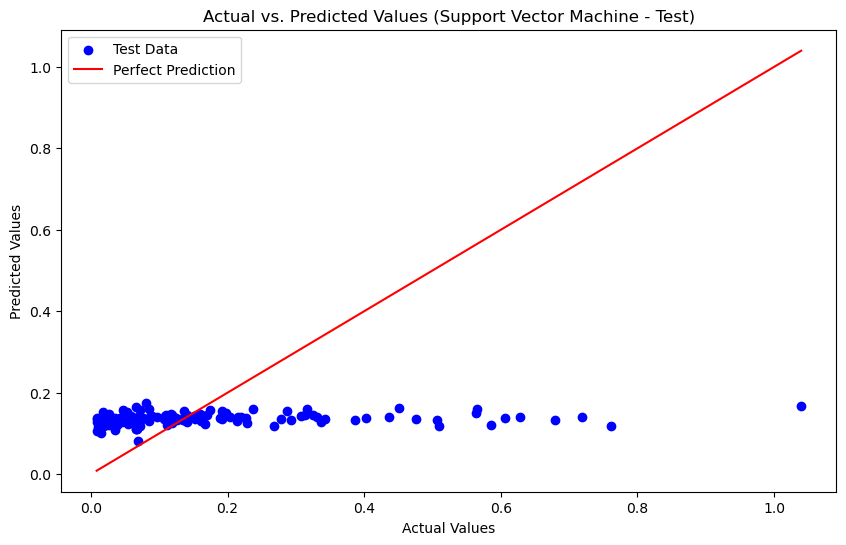

In [61]:
# Plot actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, svm_predictions, color='blue', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Support Vector Machine - Test)')
plt.legend()
plt.show()

In [62]:
import pandas as pd

# One-hot encode the 'key' column just for neural network
df_neural_network = pd.get_dummies(df, columns=['key'], prefix='key')
df_neural_network

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10
0,Tarot,"Bad Bunny, Jhay Cortez",2,2022,5,6,2482,20,6.082286e+08,27,...,False,False,False,False,False,False,False,False,False,False
1,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",2,2022,6,17,5871,27,6.188855e+08,81,...,False,False,False,False,False,False,False,False,False,False
2,When I R.I.P.,Labrinth,1,2019,10,4,2578,0,2.036803e+08,8,...,True,False,False,False,False,False,False,False,False,False
3,The Feels,TWICE,1,2021,10,1,1150,0,3.459036e+08,20,...,False,True,False,False,False,False,False,False,False,False
4,TV,Billie Eilish,1,2022,7,21,3009,2,3.385650e+08,68,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Niï¿½ï¿½a Bo,"Sean Paul, Feid",2,2023,4,21,1305,34,1.150100e+08,29,...,False,False,False,False,False,False,False,True,False,False
949,Space Song,Beach House,1,2015,1,1,17852,4,7.897539e+08,69,...,False,False,False,False,False,False,False,True,False,False
950,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,1.861043e+08,9,...,False,False,False,False,False,False,False,True,False,False
951,Bad Habits,Ed Sheeran,1,2020,9,3,12755,8,1.555511e+09,344,...,False,False,False,False,False,False,False,False,False,False


## Simple Neural network 

In [63]:
def plot_loss(history):
    """
    A helper function to plot the testing/validation loss for neural network.
    """

    # Get the lowest loss values and their corresponding epochs
    min_loss_value = np.min(history.history['loss'])
    min_loss_index = np.argmin(history.history['loss'])
    min_val_loss_value = np.min(history.history['val_loss'])
    min_val_loss_index = np.argmin(history.history['val_loss'])

    # Plot the loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    # Highlight the lowest points in the graph
    plt.scatter(min_loss_index, min_loss_value, color='blue', s=150, alpha=0.6, edgecolors='black')
    plt.scatter(min_val_loss_index, min_val_loss_value, color='orange', s=150, alpha=0.6, edgecolors='black')

    # Annotate the lowest points on the graph
    lowest_train_loss = f'Lowest Training Loss ({min_loss_value}) at Epoch {min_loss_index}'
    lowest_val_loss = f'Lowest Validation Loss ({min_val_loss_value}) at Epoch {min_val_loss_index}'
    print(lowest_train_loss + '\n' + lowest_val_loss)

    plt.text(min_loss_index, min_loss_value, lowest_train_loss, fontsize=10, ha='center', va='bottom')
    plt.text(min_val_loss_index, min_val_loss_value, lowest_val_loss, fontsize=10, ha='center', va='bottom')

    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

Epoch 1/50
17/17 - 0s - loss: 0.0299 - val_loss: 0.0192 - 211ms/epoch - 12ms/step
Epoch 2/50
17/17 - 0s - loss: 0.0167 - val_loss: 0.0135 - 21ms/epoch - 1ms/step
Epoch 3/50
17/17 - 0s - loss: 0.0129 - val_loss: 0.0110 - 21ms/epoch - 1ms/step
Epoch 4/50
17/17 - 0s - loss: 0.0105 - val_loss: 0.0098 - 22ms/epoch - 1ms/step
Epoch 5/50
17/17 - 0s - loss: 0.0087 - val_loss: 0.0082 - 24ms/epoch - 1ms/step
Epoch 6/50
17/17 - 0s - loss: 0.0077 - val_loss: 0.0077 - 21ms/epoch - 1ms/step
Epoch 7/50
17/17 - 0s - loss: 0.0071 - val_loss: 0.0072 - 20ms/epoch - 1ms/step
Epoch 8/50
17/17 - 0s - loss: 0.0066 - val_loss: 0.0070 - 21ms/epoch - 1ms/step
Epoch 9/50
17/17 - 0s - loss: 0.0063 - val_loss: 0.0072 - 23ms/epoch - 1ms/step
Epoch 10/50
17/17 - 0s - loss: 0.0064 - val_loss: 0.0067 - 23ms/epoch - 1ms/step
Epoch 11/50
17/17 - 0s - loss: 0.0061 - val_loss: 0.0069 - 24ms/epoch - 1ms/step
Epoch 12/50
17/17 - 0s - loss: 0.0054 - val_loss: 0.0066 - 22ms/epoch - 1ms/step
Epoch 13/50
17/17 - 0s - loss: 0.00

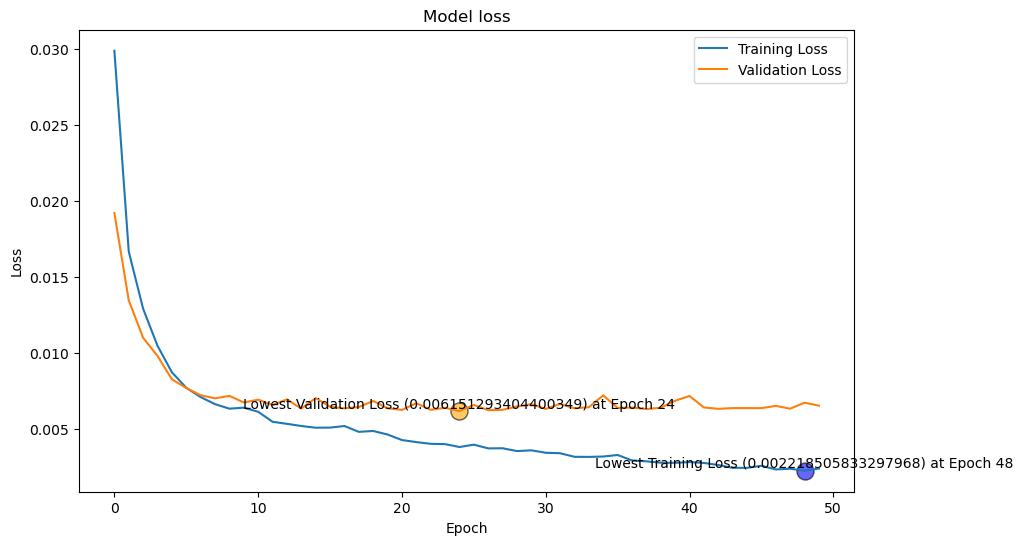

5/5 [==============================] - 0s 673us/step
Neural Network Root Mean Squared Error (Scaled): 0.09646045557843035
Neural Network Root Mean Squared Error (Original Scale): 343644337.96714526


In [64]:
# simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(X_train_scaled, y_train_scaled,epochs=50, batch_size=32,validation_split=0.2, verbose=2)

# Plot the loss
plot_loss(history)

# Evaluate model performance on the test set
nn_predictions_scaled = model.predict(X_test_scaled)

# Evaluate model performance for neural network
nn_rmse_scaled = sqrt(mean_squared_error(y_test_scaled, nn_predictions_scaled))
print("Neural Network Root Mean Squared Error (Scaled):", nn_rmse_scaled)

# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Evaluate model performance for neural network on the original scale
nn_rmse = sqrt(mean_squared_error(y_test, nn_predictions))
print("Neural Network Root Mean Squared Error (Original Scale):", nn_rmse)


## Intermediate Neural Network 

Epoch 1/50
17/17 - 0s - loss: 0.0218 - val_loss: 0.0130 - 200ms/epoch - 12ms/step
Epoch 2/50
17/17 - 0s - loss: 0.0126 - val_loss: 0.0091 - 25ms/epoch - 1ms/step
Epoch 3/50
17/17 - 0s - loss: 0.0098 - val_loss: 0.0080 - 24ms/epoch - 1ms/step
Epoch 4/50
17/17 - 0s - loss: 0.0082 - val_loss: 0.0073 - 23ms/epoch - 1ms/step
Epoch 5/50
17/17 - 0s - loss: 0.0071 - val_loss: 0.0066 - 21ms/epoch - 1ms/step
Epoch 6/50
17/17 - 0s - loss: 0.0072 - val_loss: 0.0084 - 23ms/epoch - 1ms/step
Epoch 7/50
17/17 - 0s - loss: 0.0061 - val_loss: 0.0062 - 23ms/epoch - 1ms/step
Epoch 8/50
17/17 - 0s - loss: 0.0060 - val_loss: 0.0059 - 26ms/epoch - 2ms/step
Epoch 9/50
17/17 - 0s - loss: 0.0054 - val_loss: 0.0061 - 26ms/epoch - 2ms/step
Epoch 10/50
17/17 - 0s - loss: 0.0052 - val_loss: 0.0060 - 28ms/epoch - 2ms/step
Epoch 11/50
17/17 - 0s - loss: 0.0050 - val_loss: 0.0062 - 24ms/epoch - 1ms/step
Epoch 12/50
17/17 - 0s - loss: 0.0049 - val_loss: 0.0063 - 24ms/epoch - 1ms/step
Epoch 13/50
17/17 - 0s - loss: 0.00

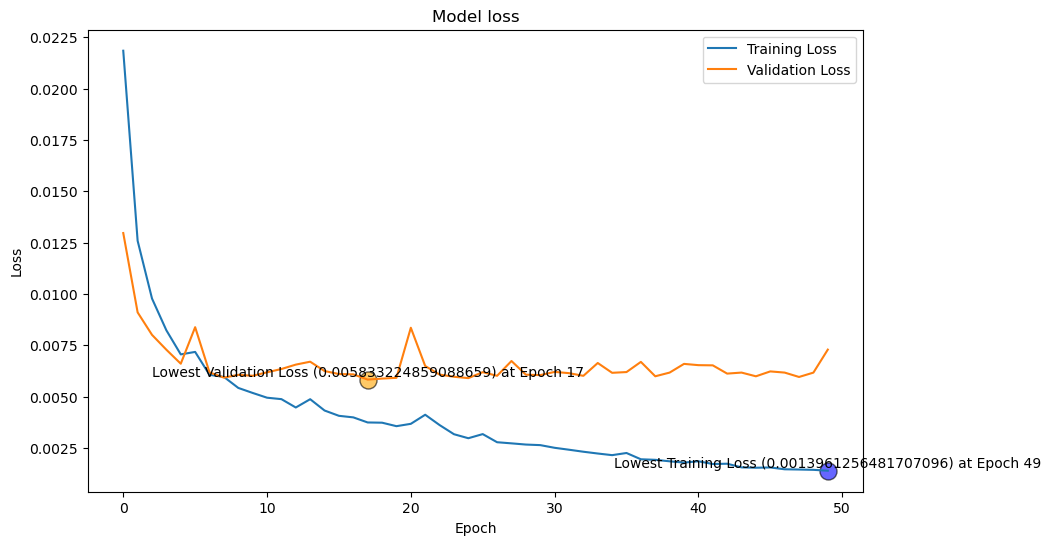

5/5 [==============================] - 0s 793us/step
Neural Network Root Mean Squared Error (Scaled): 0.08511263283250955
Neural Network Root Mean Squared Error (Original Scale): 303217254.35893404


In [65]:
# Intermediate neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(X_train_scaled, y_train_scaled,epochs=50, batch_size=32,validation_split=0.2,verbose=2)

# Plot the loss
plot_loss(history)

# Evaluate model performance on the test set
nn_predictions_scaled = model.predict(X_test_scaled)

# Evaluate model performance for neural network
nn_rmse_scaled = sqrt(mean_squared_error(y_test_scaled, nn_predictions_scaled))
print("Neural Network Root Mean Squared Error (Scaled):", nn_rmse_scaled)

# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Evaluate model performance for neural network on the original scale
nn_rmse = sqrt(mean_squared_error(y_test, nn_predictions))
print("Neural Network Root Mean Squared Error (Original Scale):", nn_rmse)

## Advanced Neural Network

Epoch 1/100
67/67 - 0s - loss: 0.3004 - val_loss: 0.2345 - 463ms/epoch - 7ms/step
Epoch 2/100
67/67 - 0s - loss: 0.1961 - val_loss: 0.1593 - 141ms/epoch - 2ms/step
Epoch 3/100
67/67 - 0s - loss: 0.1345 - val_loss: 0.1094 - 157ms/epoch - 2ms/step
Epoch 4/100
67/67 - 0s - loss: 0.0956 - val_loss: 0.0795 - 149ms/epoch - 2ms/step
Epoch 5/100
67/67 - 0s - loss: 0.0717 - val_loss: 0.0608 - 151ms/epoch - 2ms/step
Epoch 6/100
67/67 - 0s - loss: 0.0552 - val_loss: 0.0477 - 150ms/epoch - 2ms/step
Epoch 7/100
67/67 - 0s - loss: 0.0448 - val_loss: 0.0389 - 149ms/epoch - 2ms/step
Epoch 8/100
67/67 - 0s - loss: 0.0364 - val_loss: 0.0327 - 160ms/epoch - 2ms/step
Epoch 9/100
67/67 - 0s - loss: 0.0308 - val_loss: 0.0279 - 154ms/epoch - 2ms/step
Epoch 10/100
67/67 - 0s - loss: 0.0265 - val_loss: 0.0238 - 147ms/epoch - 2ms/step
Epoch 11/100
67/67 - 0s - loss: 0.0227 - val_loss: 0.0217 - 156ms/epoch - 2ms/step
Epoch 12/100
67/67 - 0s - loss: 0.0204 - val_loss: 0.0189 - 155ms/epoch - 2ms/step
Epoch 13/100


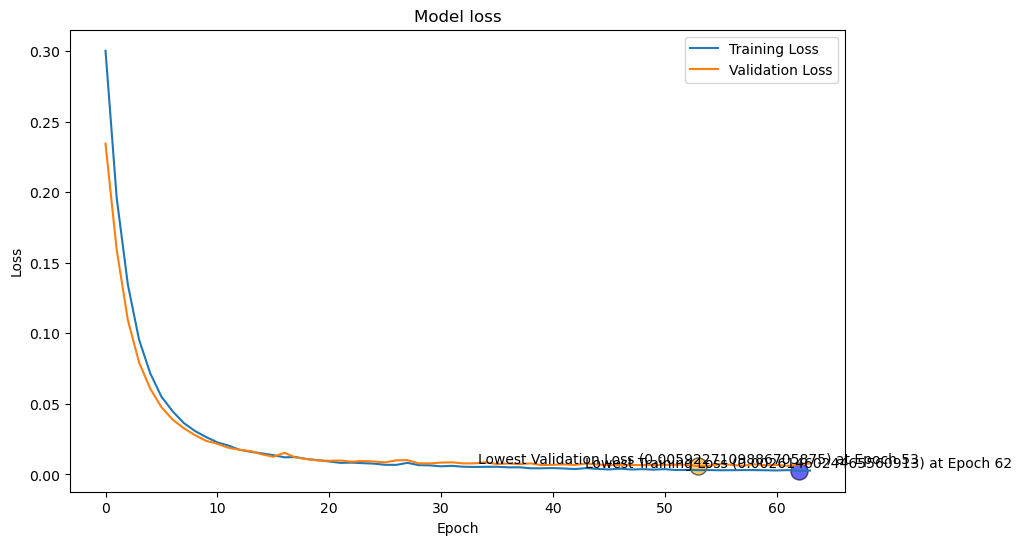

5/5 [==============================] - 0s 1ms/step
Neural Network Root Mean Squared Error (Scaled): 5.1402056333114246e+17
Neural Network Root Mean Squared Error (Original Scale): 313486366.67513704


In [66]:
from keras.optimizers import Adam, Nadam, RMSprop
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
opt = Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with validation data
history = model.fit(X_train_scaled, y_train_scaled,epochs=100, batch_size=8,validation_split=0.2,verbose=2, callbacks=[early_stopping])

# Plot the loss
plot_loss(history)

# Evaluate model performance on the test set
nn_predictions_scaled = model.predict(X_test_scaled)

# Evaluate model performance for neural network
nn_rmse_scaled = mean_squared_error(y_test_scaled, nn_predictions)
print("Neural Network Root Mean Squared Error (Scaled):", nn_rmse_scaled)

# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Evaluate model performance for neural network on the original scale
nn_rmse = sqrt(mean_squared_error(y_test, nn_predictions))
print("Neural Network Root Mean Squared Error (Original Scale):", nn_rmse)

5/5 [==============================] - 0s 1ms/step


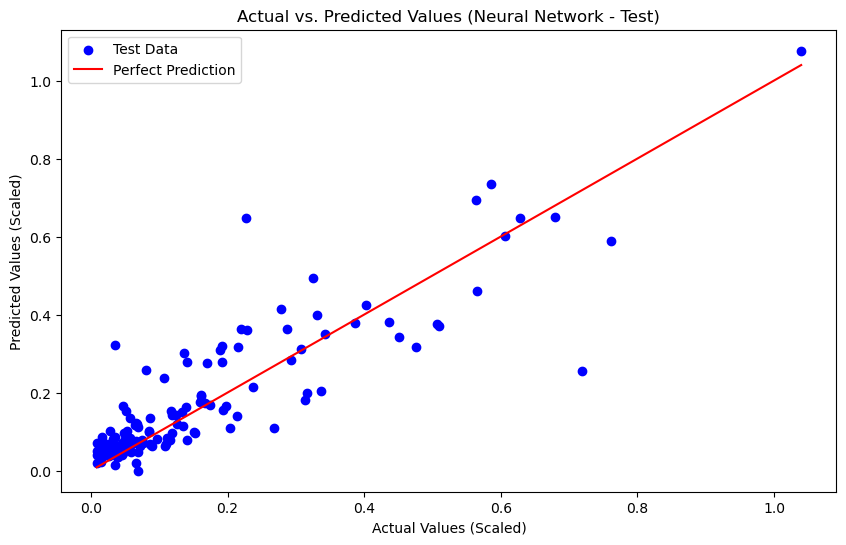

In [67]:
# Make predictions on the scaled test set
nn_predictions_scaled = model.predict(X_test_scaled)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, nn_predictions_scaled, color='blue', label='Test Data')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', label='Perfect Prediction')

# Uncomment the next two lines if you want to use log scale
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Actual Values (Scaled)')
plt.ylabel('Predicted Values (Scaled)')
plt.title('Actual vs. Predicted Values (Neural Network - Test)')
plt.legend()
plt.show()

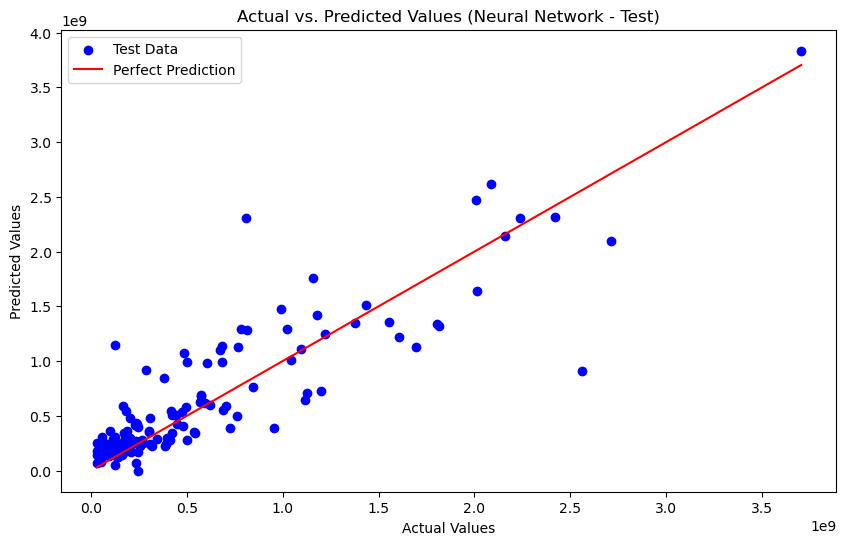

In [68]:
# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, color='blue', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')

# Uncomment the next two lines if you want to use log scale
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network - Test)')
plt.legend()
plt.show()

## Simple Neural Network (musical features)

Epoch 1/50
17/17 - 0s - loss: 0.0673 - val_loss: 0.0413 - 189ms/epoch - 11ms/step
Epoch 2/50
17/17 - 0s - loss: 0.0312 - val_loss: 0.0262 - 24ms/epoch - 1ms/step
Epoch 3/50
17/17 - 0s - loss: 0.0278 - val_loss: 0.0248 - 25ms/epoch - 1ms/step
Epoch 4/50
17/17 - 0s - loss: 0.0257 - val_loss: 0.0236 - 24ms/epoch - 1ms/step
Epoch 5/50
17/17 - 0s - loss: 0.0251 - val_loss: 0.0234 - 25ms/epoch - 1ms/step
Epoch 6/50
17/17 - 0s - loss: 0.0247 - val_loss: 0.0228 - 28ms/epoch - 2ms/step
Epoch 7/50
17/17 - 0s - loss: 0.0241 - val_loss: 0.0228 - 28ms/epoch - 2ms/step
Epoch 8/50
17/17 - 0s - loss: 0.0241 - val_loss: 0.0227 - 27ms/epoch - 2ms/step
Epoch 9/50
17/17 - 0s - loss: 0.0236 - val_loss: 0.0230 - 24ms/epoch - 1ms/step
Epoch 10/50
17/17 - 0s - loss: 0.0232 - val_loss: 0.0218 - 23ms/epoch - 1ms/step
Epoch 11/50
17/17 - 0s - loss: 0.0223 - val_loss: 0.0218 - 23ms/epoch - 1ms/step
Epoch 12/50
17/17 - 0s - loss: 0.0222 - val_loss: 0.0215 - 22ms/epoch - 1ms/step
Epoch 13/50
17/17 - 0s - loss: 0.02

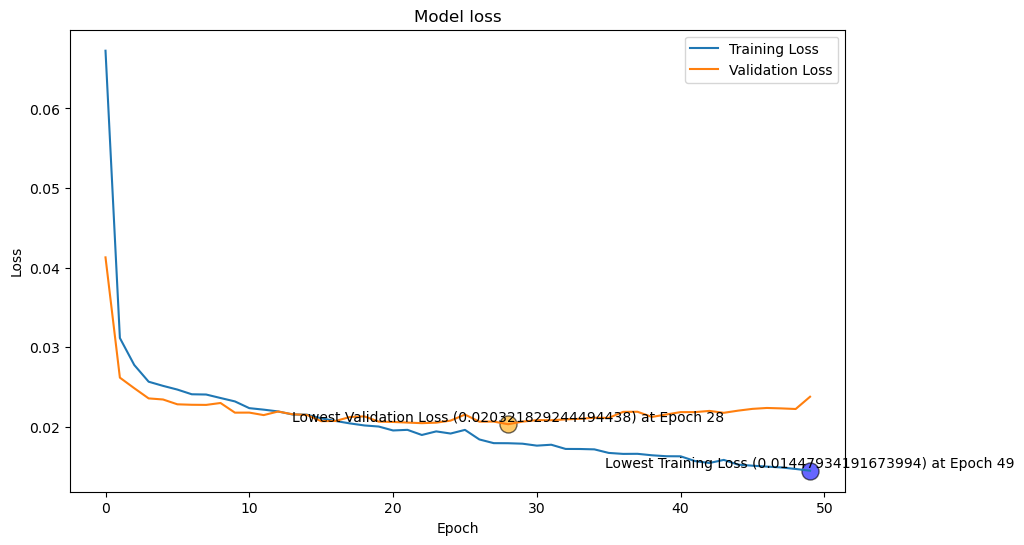

5/5 [==============================] - 0s 690us/step
Neural Network Root Mean Squared Error (Scaled): 0.1891577362150754
Neural Network Root Mean Squared Error (Original Scale): 673882215.553563


In [69]:
# simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled_mus.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(X_train_scaled_mus, y_train_scaled_mus,epochs=50, batch_size=32,validation_split=0.2, verbose=2)

# Plot the loss
plot_loss(history)

# Evaluate model performance on the test set
nn_predictions_scaled = model.predict(X_test_scaled_mus)

# Evaluate model performance for neural network
nn_rmse_scaled = sqrt(mean_squared_error(y_test_scaled_mus, nn_predictions_scaled))
print("Neural Network Root Mean Squared Error (Scaled):", nn_rmse_scaled)

# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Evaluate model performance for neural network on the original scale
nn_rmse = sqrt(mean_squared_error(y_test_mus, nn_predictions))
print("Neural Network Root Mean Squared Error (Original Scale):", nn_rmse)

## Intermediate Neural Network (musical features)

Epoch 1/50
17/17 - 0s - loss: 0.0264 - val_loss: 0.0327 - 449ms/epoch - 26ms/step
Epoch 2/50
17/17 - 0s - loss: 0.0235 - val_loss: 0.0314 - 22ms/epoch - 1ms/step
Epoch 3/50
17/17 - 0s - loss: 0.0227 - val_loss: 0.0318 - 20ms/epoch - 1ms/step
Epoch 4/50
17/17 - 0s - loss: 0.0222 - val_loss: 0.0308 - 21ms/epoch - 1ms/step
Epoch 5/50
17/17 - 0s - loss: 0.0219 - val_loss: 0.0302 - 22ms/epoch - 1ms/step
Epoch 6/50
17/17 - 0s - loss: 0.0212 - val_loss: 0.0311 - 24ms/epoch - 1ms/step
Epoch 7/50
17/17 - 0s - loss: 0.0212 - val_loss: 0.0305 - 24ms/epoch - 1ms/step
Epoch 8/50
17/17 - 0s - loss: 0.0208 - val_loss: 0.0312 - 22ms/epoch - 1ms/step
Epoch 9/50
17/17 - 0s - loss: 0.0198 - val_loss: 0.0331 - 23ms/epoch - 1ms/step
Epoch 10/50
17/17 - 0s - loss: 0.0209 - val_loss: 0.0319 - 22ms/epoch - 1ms/step
Epoch 11/50
17/17 - 0s - loss: 0.0200 - val_loss: 0.0312 - 22ms/epoch - 1ms/step
Epoch 12/50
17/17 - 0s - loss: 0.0200 - val_loss: 0.0305 - 24ms/epoch - 1ms/step
Epoch 13/50
17/17 - 0s - loss: 0.01

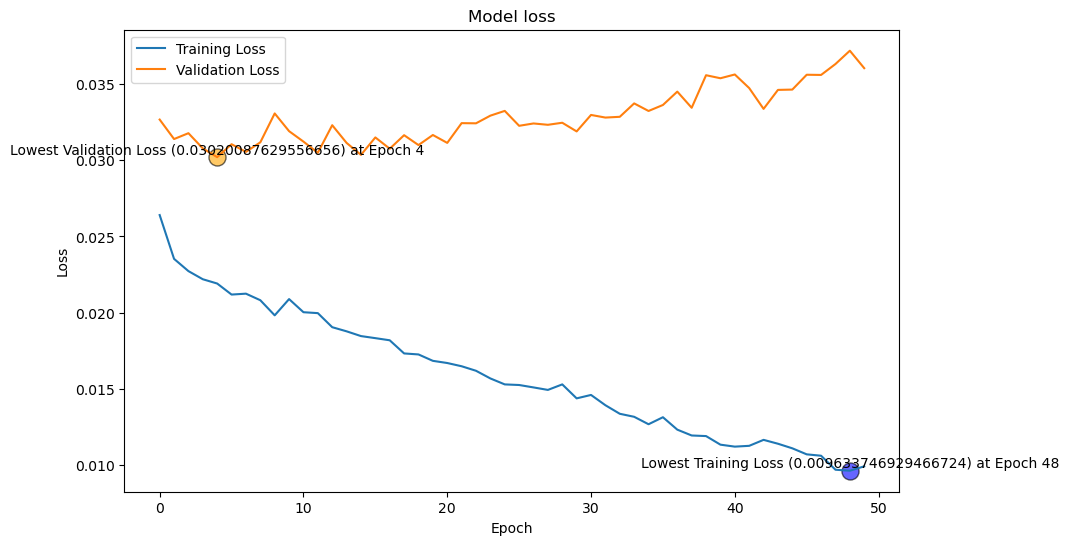

5/5 [==============================] - 0s 685us/step
Neural Network Root Mean Squared Error (Scaled): 0.16237336354257273
Neural Network Root Mean Squared Error (Original Scale): 578461786.6076263


In [280]:
# Intermediate neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled_mus.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(X_train_scaled_mus, y_train_scaled_mus,epochs=50, batch_size=32,validation_split=0.2,verbose=2)

# Plot the loss
plot_loss(history)

# Evaluate model performance on the test set
nn_predictions_scaled = model.predict(X_test_scaled_mus)

# Evaluate model performance for neural network
nn_rmse_scaled = sqrt(mean_squared_error(y_test_scaled_mus, nn_predictions_scaled))
print("Neural Network Root Mean Squared Error (Scaled):", nn_rmse_scaled)

# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Evaluate model performance for neural network on the original scale
nn_rmse = sqrt(mean_squared_error(y_test_mus, nn_predictions))
print("Neural Network Root Mean Squared Error (Original Scale):", nn_rmse)

## Advanced Neural Network (musical features)

Epoch 1/100
67/67 - 0s - loss: 0.3046 - val_loss: 0.2570 - 443ms/epoch - 7ms/step
Epoch 2/100
67/67 - 0s - loss: 0.2062 - val_loss: 0.1756 - 137ms/epoch - 2ms/step
Epoch 3/100
67/67 - 0s - loss: 0.1439 - val_loss: 0.1302 - 148ms/epoch - 2ms/step
Epoch 4/100
67/67 - 0s - loss: 0.1058 - val_loss: 0.0991 - 134ms/epoch - 2ms/step
Epoch 5/100
67/67 - 0s - loss: 0.0819 - val_loss: 0.0808 - 137ms/epoch - 2ms/step
Epoch 6/100
67/67 - 0s - loss: 0.0669 - val_loss: 0.0678 - 134ms/epoch - 2ms/step
Epoch 7/100
67/67 - 0s - loss: 0.0560 - val_loss: 0.0603 - 138ms/epoch - 2ms/step
Epoch 8/100
67/67 - 0s - loss: 0.0484 - val_loss: 0.0530 - 133ms/epoch - 2ms/step
Epoch 9/100
67/67 - 0s - loss: 0.0426 - val_loss: 0.0496 - 131ms/epoch - 2ms/step
Epoch 10/100
67/67 - 0s - loss: 0.0383 - val_loss: 0.0483 - 136ms/epoch - 2ms/step
Epoch 11/100
67/67 - 0s - loss: 0.0362 - val_loss: 0.0418 - 164ms/epoch - 2ms/step
Epoch 12/100
67/67 - 0s - loss: 0.0339 - val_loss: 0.0394 - 137ms/epoch - 2ms/step
Epoch 13/100


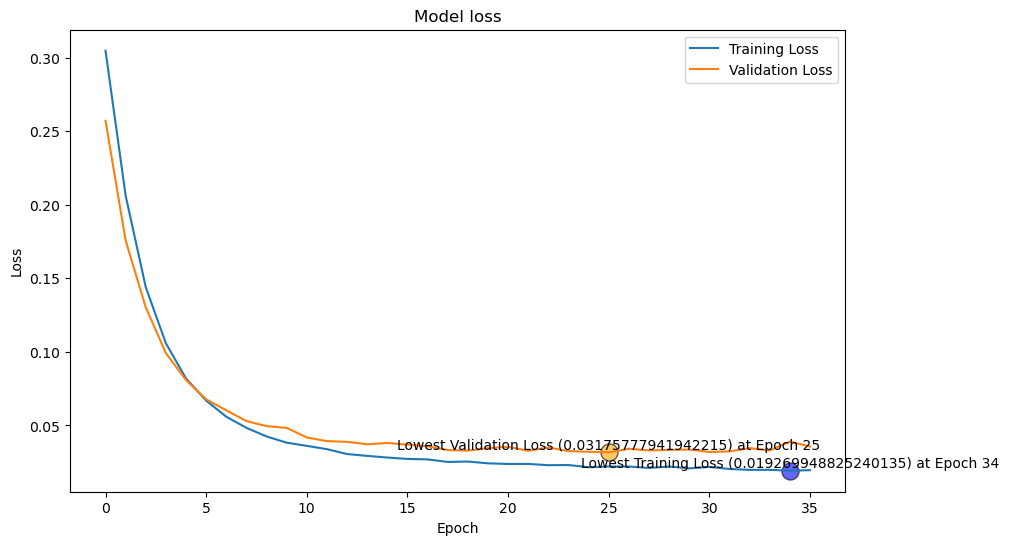

5/5 [==============================] - 0s 845us/step
Neural Network Root Mean Squared Error (Scaled): 0.020685048083344742
Neural Network Root Mean Squared Error (Original Scale): 578461786.6076263


In [281]:
from keras.optimizers import Adam, Nadam, RMSprop
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled_mus.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1, activation='linear')) 

# Compile the model
opt = Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with validation data
history = model.fit(X_train_scaled_mus, y_train_scaled_mus,epochs=100, batch_size=8,validation_split=0.2,verbose=2, callbacks=[early_stopping])

# Plot the loss
plot_loss(history)

# Evaluate model performance on the test set
nn_predictions = model.predict(X_test_scaled_mus)

# Evaluate model performance for neural network
nn_rmse_scaled = mean_squared_error(y_test_scaled_mus, nn_predictions)
print("Neural Network Root Mean Squared Error (Scaled):", nn_rmse_scaled)

# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Evaluate model performance for neural network on the original scale
nn_rmse = sqrt(mean_squared_error(y_test_mus, nn_predictions))
print("Neural Network Root Mean Squared Error (Original Scale):", nn_rmse)

5/5 [==============================] - 0s 686us/step


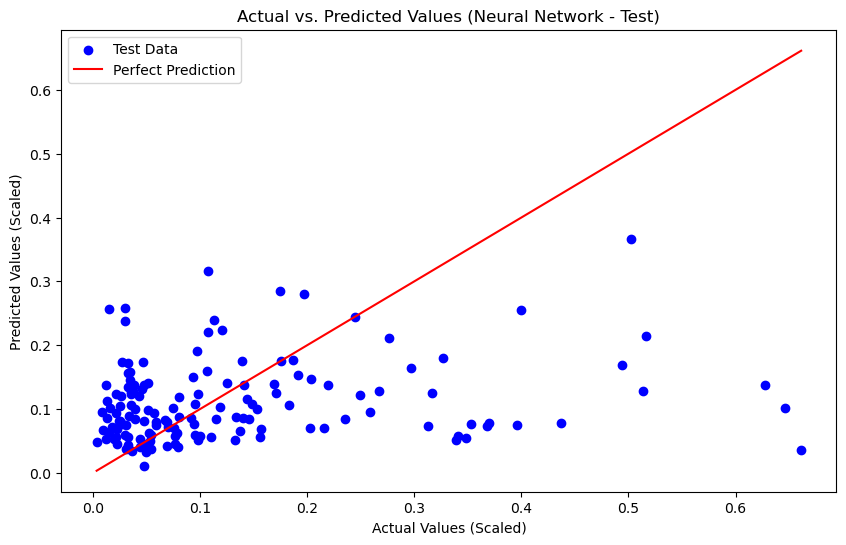

In [284]:
# Make predictions on the scaled test set
nn_predictions_scaled = model.predict(X_test_scaled_mus)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled_mus, nn_predictions_scaled, color='blue', label='Test Data')
plt.plot([min(y_test_scaled_mus), max(y_test_scaled_mus)], [min(y_test_scaled_mus), max(y_test_scaled_mus)], color='red', label='Perfect Prediction')

# Uncomment the next two lines if you want to use log scale
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Actual Values (Scaled)')
plt.ylabel('Predicted Values (Scaled)')
plt.title('Actual vs. Predicted Values (Neural Network - Test)')
plt.legend()
plt.show()

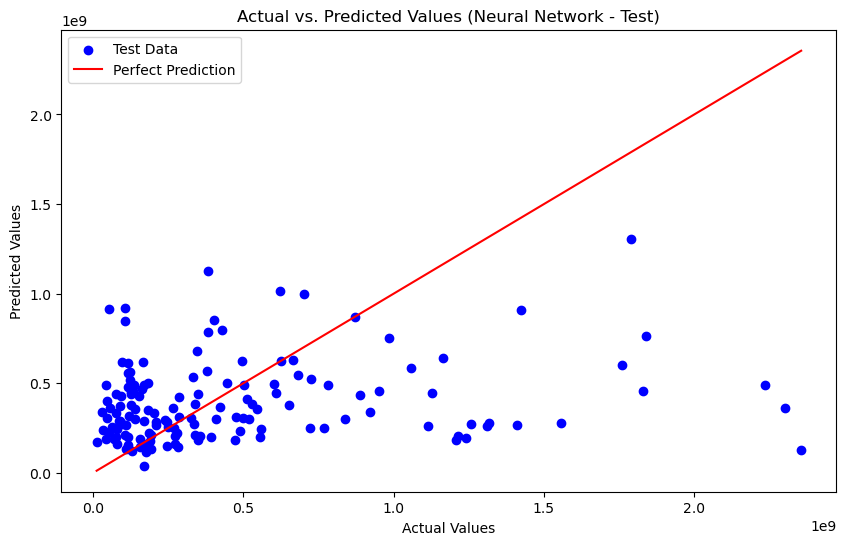

In [285]:
# Inverse transform predictions to the original scale
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled).flatten()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mus, nn_predictions, color='blue', label='Test Data')
plt.plot([min(y_test_mus), max(y_test_mus)], [min(y_test_mus), max(y_test_mus)], color='red', label='Perfect Prediction')

# Uncomment the next two lines if you want to use log scale
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network - Test)')
plt.legend()
plt.show()